In [ ]:
pip install allensdk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 17.6 MB/s 
     |████████████████████████████████| 133 kB 42.0 MB/s 
     |████████████████████████████████| 668 kB 54.5 MB/s 
     |████████████████████████████████| 130 kB 44.0 MB/s 
     |████████████████████████████████| 3.0 MB 48.6 MB/s 
     |████████████████████████████████| 118 kB 60.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 48.4 MB 28 kB/s 
     |████████████████████████████████| 26.5 MB 68.6 MB/s 
     |████████████████████████████████| 77 kB 7.1 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 4.3 MB 40.1 MB/s 
     |████████████████████████████████| 130 kB 49.3 MB/s 
     |████████████████████████████████| 186 kB 56.5 MB/s 
     |███████████████████

# Imports


In [ ]:


from allensdk.api.queries.image_download_api import ImageDownloadApi
from allensdk.api.queries.synchronization_api import SynchronizationApi
from allensdk.config.manifest import Manifest
from allensdk.core.reference_space_cache import ReferenceSpaceCache
import matplotlib.pyplot as plt
from skimage.io import imread
import pandas as pd
import logging
import os
from base64 import b64encode
import numpy as np
from IPython.display import HTML, display
%matplotlib inline
from PIL import Image
import copy


# Utils

## Configs

In [ ]:
annotation = True
downsample = 0
reference_space_key = 'annotation/ccf_2017'
resolution = 25
ROIs_database = pd.DataFrame(columns=(
                 'section_data_set_id',
                 'section_image_id',
                 'x_sec',
                 'y_sec',
                 'structure_acronym',
                 'structure_id',
                 'x_ref',
                 'y_ref',
                 'z_ref',
                 'destination'
                 ))
rows_list = []
structure_data_set_ids_list = [70928385,71249069,71836787,71836878,72081516,72119628,73520964,73521804,73636030,73771240,75042244,75650864,76135829,77413698,79488931,79591637,79912554]
structure_ids_list = [1056, #ANcr1
                     507, # MOB
                     726 # DG
                     ]

## API & modul instances 

In [ ]:

image_api = ImageDownloadApi()
sync_api = SynchronizationApi()
rspc = ReferenceSpaceCache(resolution, reference_space_key, manifest=os.path.join("allen_ccf", "manifest.json"))
tree = rspc.get_structure_tree(structure_graph_id=1) 
annotation, meta = rspc.get_annotation_volume()
rsp = rspc.get_reference_space()


2022-08-16 15:04:58,292 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/annotation_25.nrrd
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/annotation_25.nrrd


## Plotters

In [ ]:
def verify_image(file_path, figsize=(18, 22)):
    image = imread(file_path)

    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(image)
    
    
def verify_svg(file_path, width_scale, height_scale):
    # we're using this function to display scaled svg in the rendered notebook.
    # we suggest that in your own work you use a tool such as inkscape or illustrator to view svg
    
    with open(file_path, 'rb') as svg_file:
        svg = svg_file.read()
    encoded_svg = b64encode(svg)
    decoded_svg = encoded_svg.decode('ascii')
    
    st = r'<img class="figure" src="data:image/svg+xml;base64,{}" width={}% height={}%></img>'.format(decoded_svg, width_scale, height_scale)
    display(HTML(st))

## Getting whole images of a dataset and plotting samples

In [ ]:
 rm -r '/content/75214738_section_images'

In [ ]:
section_data_set_id = 100048576
section_image_directory = '75214738_section_images'
format_str = '.jpg'

section_images = image_api.section_image_query(section_data_set_id)
section_image_ids = [si['id'] for si in section_images]

print(len(section_image_ids))

# The following line will temporarily disable the download logger.
logging.getLogger('allensdk.api.api.retrieve_file_over_http').disabled = True

for section_image_id in section_image_ids:
    
    file_name = str(section_image_id) + format_str
    file_path = os.path.join(section_image_directory, file_name)
    
    Manifest.safe_make_parent_dirs(file_path)
    image_api.download_section_image(section_image_id, file_path=file_path, downsample=6)
    
# re-enable the logger
logging.getLogger('allensdk.api.api.retrieve_file_over_http').disabled = False

509


In [ ]:
file_names = os.listdir(section_image_directory)
print(len(file_names))

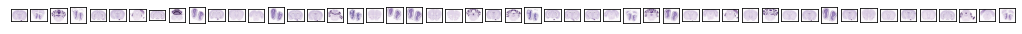

In [97]:
display_file_paths = [os.path.join(section_image_directory, dfn) for dfn in file_names[::10]]

fig, ax = plt.subplots(ncols=len(display_file_paths), figsize=(18, 22))
for ii, dfp in enumerate(display_file_paths):
    image = imread(dfp)
    ax[ii].imshow(image)
    ax[ii].get_xaxis().set_visible(False)
    ax[ii].get_yaxis().set_visible(False)

# Test Aquiring labels


In [ ]:
tree.get_structures_by_id([77])

[{'acronym': 'SPVOcdm',
  'graph_id': 1,
  'graph_order': 957,
  'id': 77,
  'name': 'Spinal nucleus of the trigeminal, oral part, caudal dorsomedial part',
  'structure_id_path': [997, 8, 343, 1065, 354, 386, 445, 77],
  'structure_set_ids': [12],
  'rgb_triplet': [255, 165, 210]}]

In [75]:
tree.get_structures_by_acronym(['VIS'])

[{'acronym': 'VIS',
  'graph_id': 1,
  'graph_order': 157,
  'id': 669,
  'name': 'Visual areas',
  'structure_id_path': [997, 8, 567, 688, 695, 315, 669],
  'structure_set_ids': [3,
   112905828,
   691663206,
   12,
   184527634,
   112905813,
   114512891,
   114512892],
  'rgb_triplet': [8, 133, 140]}]

In [ ]:

label = sync_api.get_image_to_atlas(section_image_id=79455317,y=2070,x=7082,atlas_id=602630314)
print(label)

{'image_sync': {'section_data_set_id': None, 'section_image_id': 576988209, 'section_number': 1143, 'x': 8669.098839463672, 'y': 2759.8201950760304}}


In [ ]:
label = sync_api.get_structure_to_image(section_data_set_id =79488931,structure_ids =[984])
print(label)

[{'image_sync': {'section_data_set_id': 79488931, 'section_image_id': 79455321, 'section_number': 85, 'x': 5506.832137092442, 'y': 1954.7527711483053}}]


In [95]:
label = sync_api.get_reference_to_image(x=11670, y=  4972, z= 7523, section_data_set_ids=[74452077],reference_space_id=9)
print(label)

[{'image_sync': {'section_data_set_id': '74452077', 'section_image_id': 74405795, 'section_number': 75, 'x': 6009.253886270709, 'y': 3898.848801962704}}]


In [ ]:
label = sync_api.get_image_to_image(section_image_id = 100960184, x = 3500, y = 13000, section_data_set_ids=[79488931] )
print(label)

[{'image_sync': {'section_data_set_id': '79488931', 'section_image_id': 79455323, 'section_number': 93, 'x': 4534.612972406923, 'y': 11717.16985061043}}]


In [ ]:
label = sync_api.get_image_to_reference(section_image_id=79455317,y=4000,x=6000 )
print(label)

{'image_to_reference': {'x': 11446.188118564824, 'y': 4972.93213112912, 'z': 7523.8814800764785}}


In [ ]:
# Some coordinate, in microns
coordinate = np.array([
    11330.640616892384,  # x anterior -> posterior
    2826.4255536801793,  # y dorsal -> ventral
    1814.3028832589898  # z left -> right
])

voxel = np.round(coordinate / resolution).astype(int)
print(voxel)
structure_id = annotation[voxel[0], voxel[1], voxel[2]]

# Each voxel in the annotation volume is annotated as specifically as possible
structure = tree.get_structures_by_id([structure_id])[0]
print(structure)

print("============")

# Structures are organized hierarchically by containment.
ancestors = tree.get_structures_by_id(structure["structure_id_path"])
for ancestor in ancestors[::-1]:
    print(ancestor["name"])

[453 113  73]
{'acronym': 'ANcr1', 'graph_id': 1, 'graph_order': 1072, 'id': 1056, 'name': 'Crus 1', 'structure_id_path': [997, 8, 512, 528, 1073, 1017, 1056], 'structure_set_ids': [184527634, 12, 691663206], 'rgb_triplet': [255, 252, 145]}
Crus 1
Ansiform lobule
Hemispheric regions
Cerebellar cortex
Cerebellum
Basic cell groups and regions
root


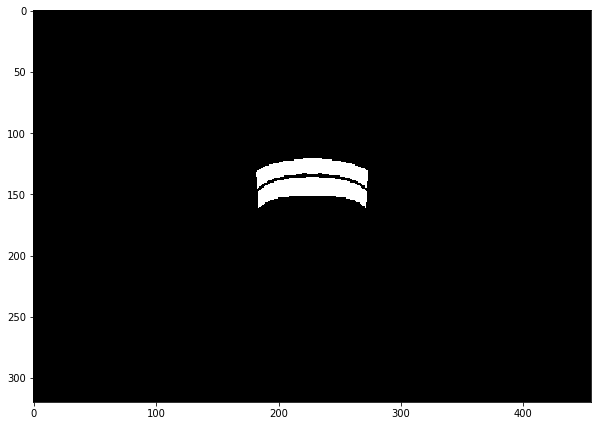

In [ ]:

# A complete mask for one structure
whole_cortex_mask = rsp.make_structure_mask([951])

# view in coronal section
fig, ax = plt.subplots(figsize=(10, 10))
mask = copy.deepcopy(whole_cortex_mask[510, :,:])
plt.imshow(mask, interpolation='none', cmap=plt.cm.afmhot)

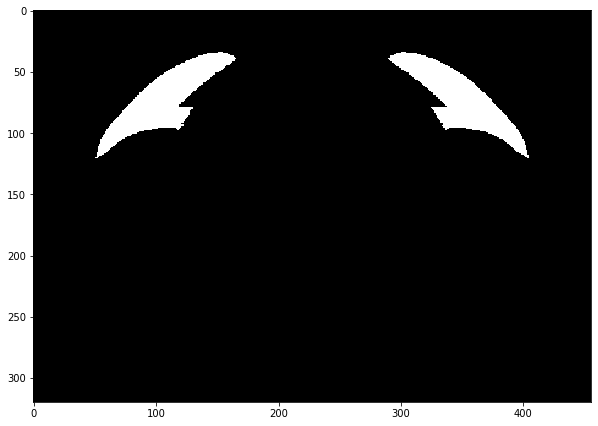

In [76]:
# A complete mask for one structure
whole_cortex_mask = rsp.make_structure_mask([669])

# view in coronal section
fig, ax = plt.subplots(figsize=(10, 10))
mask = copy.deepcopy(whole_cortex_mask[400, :,:])
plt.imshow(mask, interpolation='none', cmap=plt.cm.afmhot)

7


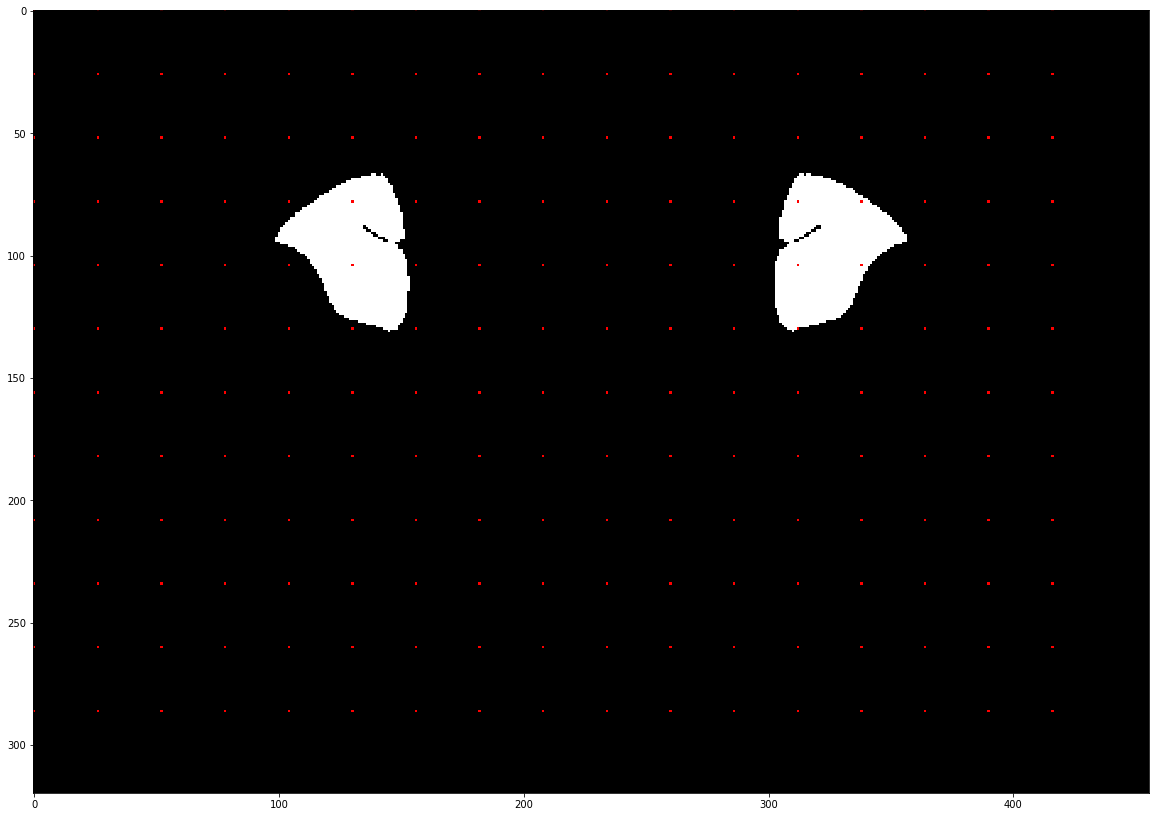

In [ ]:
whole_cortex_mask = rsp.make_structure_mask([1056])
mask = copy.deepcopy(whole_cortex_mask[480, :,:])
(mask_width, mask_height) = mask.shape
frames = np.empty((mask_width, mask_height, 3)) 
frames[:,:,0] = mask
frames[:,:,1] = mask
frames[:,:,2] = mask
count = 0
w = int(334*2 / 25)
h = int(334*2 / 25)
(mask_width, mask_height, mask_rgb) = frames.shape
for i in range(int(mask_width / w)):
    for j in range(int(mask_height / h)):
      if frames[i*w][j*h][0] > 0:
        count +=1
      frames[i*w][j*h][0] = 255
      frames[i*w][j*h][1] = 0
      frames[i*w][j*h][2] = 0
        
print(count)
fig, ax = plt.subplots(figsize=(20, 20))
plt.imshow(frames, interpolation='none', cmap=plt.cm.afmhot)

# Getting and storing an image from index of center in the reference space

In [77]:
 rm -r '/content/rspv_1085'

rm: cannot remove '/content/rspv_1085': No such file or directory


In [78]:
 rm -r '/content/MOB_507'

In [79]:
rm -r '/content/DG_726'

In [81]:
 rm -r '/content/PYR_951'

In [ ]:
def getROIByIndex(section_image_id,x,y,width,height,destination_path):
  image_api.download_section_image(section_image_id, destination_path, top = y, left = x, width = width, height = height,downsample_dimensions  = False,downsample = 1)
  #verify_image(destination_path)
#getROIByIndex(79455317,7000-334,2000-334,334,334,'69750516.jpg')

In [99]:
def get_reference_to_image(x,y,z,section_data_set_ids,reference_space_id,structure_acronym,structure_id,width,height):
  json_response  = sync_api.get_reference_to_image(x=x, y=  y, z= z, section_data_set_ids=section_data_set_ids,reference_space_id=reference_space_id)
  format_str = '.jpg'
  overlap = False # to check if the new ROI overlap with an old one. if there is less then 150 distance on the x or y coords we skip it.
  for row in json_response:
    response_body = row['image_sync']
    for item in rows_list:
      if item['section_image_id'] == response_body['section_image_id'] and ( (abs(item['x_sec'] - response_body['x']) < 100) and (abs(item['y_sec'] - response_body['y']) < 100)):
        print("Warning: overlaped images will not be saved" )   
        overlap = True
        #print(overlap)
        break
    if overlap == True:     
      overlap == False
      continue
      
    directory_name = structure_acronym +'_'+ str(structure_id)
    file_name = f"{response_body['section_image_id']}_{response_body['x']}_{response_body['y']}{format_str}"
    destination_path = os.path.join(directory_name, file_name)
    print(destination_path)
    Manifest.safe_make_parent_dirs(destination_path) 
    getROIByIndex(response_body['section_image_id'],response_body['x'],response_body['y'],width,height,destination_path)
    dict1 = { 'section_data_set_id': response_body['section_data_set_id'],
                  'section_image_id': response_body['section_image_id'],
                  'x_sec':response_body['x'],
                  'y_sec':response_body['y'],
                  'structure_acronym':structure_acronym,
                  'structure_id':structure_id,
                  'x_ref':x,
                  'y_ref':y,
                  'z_ref':z,
                  'destination':destination_path}
    rows_list.append(dict1)
# get_reference_to_image(x=11430, y=  2826, z= 1814, section_data_set_ids=[79488931],reference_space_id=9,structure_acronym='ANcr1__',structure_id=1085,width=334,height=334)

In [100]:
def getROIsFrom3DMasks_per_structure(mask,section_data_set_ids,structure_acronym,structure_id,reference_space_id,resolution,width,height):
  w = int(width*2 / resolution)
  h = int(height*2 / resolution)
  steps_on_z_axis = 4 # steps to skip layers on the z axis. otherwise we will make a lot of uneccessary calls.
  count = 0
  (mask_depth,mask_width, mask_height) = mask.shape
  print(mask.shape)
  for k in range(int(mask_depth/steps_on_z_axis)):
    for i in range(int(mask_width / w)):
      for j in range(int(mask_height / h)):
        if mask[k*steps_on_z_axis][i*w][j*h] > 0:
          get_reference_to_image(z=j*h*resolution-width/2,
                                y=i*w*resolution-height/2,
                                x= k*25*steps_on_z_axis,
                                section_data_set_ids=section_data_set_ids,
                                reference_space_id=reference_space_id,
                                structure_acronym=structure_acronym,
                                structure_id=structure_id,
                                width=width,
                                height=height)
          count +=1
  return count

# mask = copy.deepcopy(whole_cortex_mask[480, :,:])
# mask_3D = copy.deepcopy(whole_cortex_mask)
# x = getROIsFrom3DMasks_per_structure(mask_3D,section_data_set_ids=[74511839],reference_space_id=9,structure_acronym='DG',structure_id=726,width=334,height=334,resolution = 25) #79488931 507, # MOB 726 # DG
# print(x)

In [101]:
def getROIsFrom3DMasks(section_data_set_ids,structure_id_list,reference_space_id,resolution,width,height):
  #for structure in structure_id_list:
  structure_infos = tree.get_structures_by_id(structure_id_list)
  for st in structure_infos:
    # A complete mask for one structure
    #print(st)
    whole_cortex_mask = rsp.make_structure_mask([st['id']])
    count = getROIsFrom3DMasks_per_structure(whole_cortex_mask,
                                         section_data_set_ids=section_data_set_ids,
                                         reference_space_id=9,
                                         structure_acronym=st['acronym'],
                                         structure_id=st['id'],
                                         width=width,
                                         height=height,
                                         resolution = resolution
                                         )
getROIsFrom3DMasks([74452077],[726,951,507,669],9,25,334,334)
#669 VIS
#1056 ANcr1
#951 PYR
#507  MOB
#726  DG

2022-08-16 16:48:03,499 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405857?downsample=1&left=8028&top=2220&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405857?downsample=1&left=8028&top=2220&width=334&height=334&downsample_dimensions=false


(528, 320, 456)
DG_726/74405857_8028.6516059194755_2220.822012752642.jpg


2022-08-16 16:48:04,208 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405855?downsample=1&left=5251&top=2613&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405855?downsample=1&left=5251&top=2613&width=334&height=334&downsample_dimensions=false


DG_726/74405855_5251.567807918029_2613.6875114215773.jpg


2022-08-16 16:48:04,718 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405855?downsample=1&left=4660&top=2595&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405855?downsample=1&left=4660&top=2595&width=334&height=334&downsample_dimensions=false


DG_726/74405855_4660.96211055974_2595.2148975737773.jpg


2022-08-16 16:48:05,659 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405855?downsample=1&left=5843&top=2632&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405855?downsample=1&left=5843&top=2632&width=334&height=334&downsample_dimensions=false


DG_726/74405855_5843.477234075324_2632.2108248073.jpg


2022-08-16 16:48:06,161 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405853?downsample=1&left=4636&top=2308&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405853?downsample=1&left=4636&top=2308&width=334&height=334&downsample_dimensions=false


DG_726/74405853_4636.0108719865575_2308.621522032341.jpg


2022-08-16 16:48:06,667 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405853?downsample=1&left=5227&top=2326&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405853?downsample=1&left=5227&top=2326&width=334&height=334&downsample_dimensions=false


DG_726/74405853_5227.071540649175_2326.4477562281754.jpg


2022-08-16 16:48:07,168 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405853?downsample=1&left=5818&top=2344&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405853?downsample=1&left=5818&top=2344&width=334&height=334&downsample_dimensions=false


DG_726/74405853_5818.132209311794_2344.2739904240107.jpg


2022-08-16 16:48:07,967 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405849?downsample=1&left=4588&top=2507&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405849?downsample=1&left=4588&top=2507&width=334&height=334&downsample_dimensions=false


DG_726/74405849_4588.627552549728_2507.3870140019953.jpg


2022-08-16 16:48:08,414 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405849?downsample=1&left=5771&top=2520&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405849?downsample=1&left=5771&top=2520&width=334&height=334&downsample_dimensions=false


DG_726/74405849_5771.217311941297_2520.101739011553.jpg


2022-08-16 16:48:08,923 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405849?downsample=1&left=3997&top=2501&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405849?downsample=1&left=3997&top=2501&width=334&height=334&downsample_dimensions=false


DG_726/74405849_3997.767504144464_2501.0376301957303.jpg


2022-08-16 16:48:09,736 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405847?downsample=1&left=4043&top=2453&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405847?downsample=1&left=4043&top=2453&width=334&height=334&downsample_dimensions=false


DG_726/74405847_4043.889859204781_2453.4850527288727.jpg


2022-08-16 16:48:10,260 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405847?downsample=1&left=4635&top=2458&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405847?downsample=1&left=4635&top=2458&width=334&height=334&downsample_dimensions=false


DG_726/74405847_4635.193928034715_2458.928858758274.jpg


2022-08-16 16:48:10,769 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405847?downsample=1&left=5817&top=2469&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405847?downsample=1&left=5817&top=2469&width=334&height=334&downsample_dimensions=false


DG_726/74405847_5817.802065694585_2469.816470817078.jpg


2022-08-16 16:48:11,275 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405847?downsample=1&left=6409&top=2475&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405847?downsample=1&left=6409&top=2475&width=334&height=334&downsample_dimensions=false


DG_726/74405847_6409.106134524519_2475.2602768464794.jpg


2022-08-16 16:48:12,367 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405845?downsample=1&left=4143&top=2277&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405845?downsample=1&left=4143&top=2277&width=334&height=334&downsample_dimensions=false


DG_726/74405845_4143.126145141301_2277.475425211416.jpg


2022-08-16 16:48:12,875 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405845?downsample=1&left=4734&top=2281&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405845?downsample=1&left=4734&top=2281&width=334&height=334&downsample_dimensions=false


DG_726/74405845_4734.440182185814_2281.6999119668985.jpg


2022-08-16 16:48:13,380 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405845?downsample=1&left=5917&top=2290&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405845?downsample=1&left=5917&top=2290&width=334&height=334&downsample_dimensions=false


DG_726/74405845_5917.06825627484_2290.1488854778627.jpg


2022-08-16 16:48:13,883 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405845?downsample=1&left=6508&top=2294&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405845?downsample=1&left=6508&top=2294&width=334&height=334&downsample_dimensions=false


DG_726/74405845_6508.382293319352_2294.3733722333454.jpg


2022-08-16 16:48:14,388 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405845?downsample=1&left=3552&top=2273&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405845?downsample=1&left=3552&top=2273&width=334&height=334&downsample_dimensions=false


DG_726/74405845_3552.246965391564_2273.2573486416554.jpg


2022-08-16 16:48:15,264 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405843?downsample=1&left=3540&top=2450&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405843?downsample=1&left=3540&top=2450&width=334&height=334&downsample_dimensions=false


DG_726/74405843_3540.943745722053_2450.4083894053597.jpg


2022-08-16 16:48:15,767 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405843?downsample=1&left=4132&top=2458&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405843?downsample=1&left=4132&top=2458&width=334&height=334&downsample_dimensions=false


DG_726/74405843_4132.2225136977195_2458.156264782517.jpg


2022-08-16 16:48:16,291 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405843?downsample=1&left=5906&top=2481&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405843?downsample=1&left=5906&top=2481&width=334&height=334&downsample_dimensions=false


DG_726/74405843_5906.058817624723_2481.3998909139896.jpg


2022-08-16 16:48:16,798 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405843?downsample=1&left=6497&top=2489&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405843?downsample=1&left=6497&top=2489&width=334&height=334&downsample_dimensions=false


DG_726/74405843_6497.337585600391_2489.147766291147.jpg


2022-08-16 16:48:17,734 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=2888&top=2579&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=2888&top=2579&width=334&height=334&downsample_dimensions=false


DG_726/74405839_2888.204931645835_2579.3123916670957.jpg


2022-08-16 16:48:18,176 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=3479&top=2587&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=3479&top=2587&width=334&height=334&downsample_dimensions=false


DG_726/74405839_3479.476021287054_2587.601060350469.jpg


2022-08-16 16:48:19,062 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=7027&top=2637&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=7027&top=2637&width=334&height=334&downsample_dimensions=false


DG_726/74405839_7027.537362139558_2637.3424713921368.jpg


2022-08-16 16:48:19,551 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=7618&top=2645&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=7618&top=2645&width=334&height=334&downsample_dimensions=false


DG_726/74405839_7618.808451780779_2645.6311400755094.jpg


2022-08-16 16:48:20,568 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=2912&top=2537&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=2912&top=2537&width=334&height=334&downsample_dimensions=false


DG_726/74405837_2912.6723023493005_2537.749418243568.jpg


2022-08-16 16:48:21,081 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=3504&top=2537&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=3504&top=2537&width=334&height=334&downsample_dimensions=false


DG_726/74405837_3504.0013458088015_2537.0079121877975.jpg


2022-08-16 16:48:21,588 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=7051&top=2532&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=7051&top=2532&width=334&height=334&downsample_dimensions=false


DG_726/74405837_7051.975606565801_2532.558875853171.jpg


2022-08-16 16:48:22,038 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=7643&top=2531&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=7643&top=2531&width=334&height=334&downsample_dimensions=false


DG_726/74405837_7643.304650025302_2531.8173697974.jpg


2022-08-16 16:48:23,074 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=2891&top=2499&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=2891&top=2499&width=334&height=334&downsample_dimensions=false


DG_726/74405835_2891.723961919233_2499.4901057424477.jpg


2022-08-16 16:48:23,586 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=3483&top=2496&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=3483&top=2496&width=334&height=334&downsample_dimensions=false


DG_726/74405835_3483.0460342229376_2496.6058545742726.jpg


2022-08-16 16:48:24,084 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=7030&top=2479&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=7030&top=2479&width=334&height=334&downsample_dimensions=false


DG_726/74405835_7030.978468045174_2479.300347565222.jpg


2022-08-16 16:48:24,532 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=7622&top=2476&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=7622&top=2476&width=334&height=334&downsample_dimensions=false


DG_726/74405835_7622.3005403488805_2476.416096397047.jpg


2022-08-16 16:48:25,044 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=2303&top=3065&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=2303&top=3065&width=334&height=334&downsample_dimensions=false


DG_726/74405835_2303.5826191523815_3065.957818900244.jpg


2022-08-16 16:48:25,550 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=2894&top=3063&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=2894&top=3063&width=334&height=334&downsample_dimensions=false


DG_726/74405835_2894.9046914560877_3063.073567732069.jpg


2022-08-16 16:48:26,924 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=7629&top=3603&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=7629&top=3603&width=334&height=334&downsample_dimensions=false


DG_726/74405835_7629.096902338864_3603.5842024977874.jpg


2022-08-16 16:48:27,368 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=3499&top=5314&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=3499&top=5314&width=334&height=334&downsample_dimensions=false


DG_726/74405835_3499.384584823489_5314.524346643877.jpg


2022-08-16 16:48:27,851 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=7047&top=5297&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=7047&top=5297&width=334&height=334&downsample_dimensions=false


DG_726/74405835_7047.317018645725_5297.218839634827.jpg


2022-08-16 16:48:28,377 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=2868&top=2410&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=2868&top=2410&width=334&height=334&downsample_dimensions=false


DG_726/74405833_2868.2331940210056_2410.083691244386.jpg


2022-08-16 16:48:28,893 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=3459&top=2410&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=3459&top=2410&width=334&height=334&downsample_dimensions=false


DG_726/74405833_3459.5624490880923_2410.350033691446.jpg


2022-08-16 16:48:29,415 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7007&top=2411&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7007&top=2411&width=334&height=334&downsample_dimensions=false


DG_726/74405833_7007.537979490615_2411.9480883737992.jpg


2022-08-16 16:48:29,930 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7598&top=2412&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7598&top=2412&width=334&height=334&downsample_dimensions=false


DG_726/74405833_7598.8672345577015_2412.214430820858.jpg


2022-08-16 16:48:30,377 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=2277&top=2973&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=2277&top=2973&width=334&height=334&downsample_dimensions=false


DG_726/74405833_2277.081861604253_2973.409957111442.jpg


2022-08-16 16:48:30,882 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=2868&top=2973&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=2868&top=2973&width=334&height=334&downsample_dimensions=false


DG_726/74405833_2868.4111166713396_2973.6762995585013.jpg


2022-08-16 16:48:31,389 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7599&top=3539&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7599&top=3539&width=334&height=334&downsample_dimensions=false


DG_726/74405833_7599.22307985837_3539.3996474490878.jpg


2022-08-16 16:48:31,833 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=8190&top=3539&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=8190&top=3539&width=334&height=334&downsample_dimensions=false


DG_726/74405833_8190.552334925458_3539.665989896147.jpg


2022-08-16 16:48:32,347 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=3460&top=5228&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=3460&top=5228&width=334&height=334&downsample_dimensions=false


DG_726/74405833_3460.4520623397625_5228.313075262019.jpg


2022-08-16 16:48:32,793 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7008&top=5229&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7008&top=5229&width=334&height=334&downsample_dimensions=false


DG_726/74405833_7008.427592742284_5229.911129944373.jpg


2022-08-16 16:48:33,977 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7599&top=2975&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7599&top=2975&width=334&height=334&downsample_dimensions=false


DG_726/74405833_7599.480047806504_2975.810538395265.jpg


2022-08-16 16:48:34,782 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7600&top=4666&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7600&top=4666&width=334&height=334&downsample_dimensions=false


DG_726/74405833_7600.0138157575075_4666.588363337611.jpg


2022-08-16 16:48:35,435 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=2810&top=2431&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=2810&top=2431&width=334&height=334&downsample_dimensions=false


DG_726/74405829_2810.308159861883_2431.8926218941033.jpg


2022-08-16 16:48:35,948 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=6949&top=2439&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=6949&top=2439&width=334&height=334&downsample_dimensions=false


DG_726/74405829_6949.6076143040045_2439.9151172350093.jpg


2022-08-16 16:48:36,446 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=2218&top=2994&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=2218&top=2994&width=334&height=334&downsample_dimensions=false


DG_726/74405829_2218.3191246122487_2994.339075945245.jpg


2022-08-16 16:48:36,951 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=2809&top=2995&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=2809&top=2995&width=334&height=334&downsample_dimensions=false


DG_726/74405829_2809.6476181039807_2995.485146708231.jpg


2022-08-16 16:48:37,447 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=7540&top=3004&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=7540&top=3004&width=334&height=334&downsample_dimensions=false


DG_726/74405829_7540.275566037833_3004.6537128121236.jpg


2022-08-16 16:48:37,894 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=7539&top=3568&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=7539&top=3568&width=334&height=334&downsample_dimensions=false


DG_726/74405829_7539.615024279932_3568.24623762625.jpg


2022-08-16 16:48:38,559 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=2216&top=4121&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=2216&top=4121&width=334&height=334&downsample_dimensions=false


DG_726/74405829_2216.9980410964454_4121.5241255735.jpg


2022-08-16 16:48:39,065 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=7538&top=4695&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=7538&top=4695&width=334&height=334&downsample_dimensions=false


DG_726/74405829_7538.293940764128_4695.431287254505.jpg


2022-08-16 16:48:39,579 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=6946&top=5257&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=6946&top=5257&width=334&height=334&downsample_dimensions=false


DG_726/74405829_6946.304905514495_5257.877741305647.jpg


2022-08-16 16:48:40,906 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=8131&top=3569&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=8131&top=3569&width=334&height=334&downsample_dimensions=false


DG_726/74405829_8131.378402895552_3569.3964546399566.jpg


2022-08-16 16:48:41,563 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=2808&top=4122&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=2808&top=4122&width=334&height=334&downsample_dimensions=false


DG_726/74405829_2808.7614197120665_4122.674342587206.jpg


2022-08-16 16:48:42,207 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2760&top=2208&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2760&top=2208&width=334&height=334&downsample_dimensions=false


DG_726/74405827_2760.114184308665_2208.511722045821.jpg


2022-08-16 16:48:42,717 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2176&top=2779&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2176&top=2779&width=334&height=334&downsample_dimensions=false


DG_726/74405827_2176.671551029427_2779.817912853032.jpg


2022-08-16 16:48:43,180 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2767&top=2772&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2767&top=2772&width=334&height=334&downsample_dimensions=false


DG_726/74405827_2767.9497023342465_2772.049757100962.jpg


2022-08-16 16:48:44,139 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2192&top=3906&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2192&top=3906&width=334&height=334&downsample_dimensions=false


DG_726/74405827_2192.342587080591_3906.8939829633155.jpg


2022-08-16 16:48:44,653 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2783&top=3899&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2783&top=3899&width=334&height=334&downsample_dimensions=false


DG_726/74405827_2783.6207383854103_3899.1258272112436.jpg


2022-08-16 16:48:45,154 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2791&top=4462&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2791&top=4462&width=334&height=334&downsample_dimensions=false


DG_726/74405827_2791.456256410992_4462.663862266386.jpg


2022-08-16 16:48:46,101 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=7498&top=2709&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=7498&top=2709&width=334&height=334&downsample_dimensions=false


DG_726/74405827_7498.609810670713_2709.902101101283.jpg


2022-08-16 16:48:46,543 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2184&top=3343&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2184&top=3343&width=334&height=334&downsample_dimensions=false


DG_726/74405827_2184.941966952919_3343.3535379250634.jpg


2022-08-16 16:48:47,048 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=7506&top=3273&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=7506&top=3273&width=334&height=334&downsample_dimensions=false


DG_726/74405827_7506.445328696295_3273.440136156424.jpg


2022-08-16 16:48:47,489 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=8097&top=3265&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=8097&top=3265&width=334&height=334&downsample_dimensions=false


DG_726/74405827_8097.7234800011165_3265.6719804043532.jpg


2022-08-16 16:48:48,334 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=7514&top=3836&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=7514&top=3836&width=334&height=334&downsample_dimensions=false


DG_726/74405827_7514.280846721877_3836.9781712115655.jpg


2022-08-16 16:48:49,052 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=7522&top=4400&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=7522&top=4400&width=334&height=334&downsample_dimensions=false


DG_726/74405827_7522.11636474746_4400.516206266708.jpg


2022-08-16 16:48:51,033 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=7444&top=2773&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=7444&top=2773&width=334&height=334&downsample_dimensions=false


DG_726/74405825_7444.088090050737_2773.96002960821.jpg


2022-08-16 16:48:51,539 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=2127&top=3385&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=2127&top=3385&width=334&height=334&downsample_dimensions=false


DG_726/74405825_2127.8624431827634_3385.5909218507204.jpg


2022-08-16 16:48:51,980 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=7449&top=3337&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=7449&top=3337&width=334&height=334&downsample_dimensions=false


DG_726/74405825_7449.6099211625215_3337.5256889590564.jpg


2022-08-16 16:48:52,478 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=2133&top=3949&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=2133&top=3949&width=334&height=334&downsample_dimensions=false


DG_726/74405825_2133.384274294547_3949.156581201568.jpg


2022-08-16 16:48:52,986 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=7455&top=3901&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=7455&top=3901&width=334&height=334&downsample_dimensions=false


DG_726/74405825_7455.131752274306_3901.091348309904.jpg


2022-08-16 16:48:53,427 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=2730&top=4507&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=2730&top=4507&width=334&height=334&downsample_dimensions=false


DG_726/74405825_2730.2113807374153_4507.381659120008.jpg


2022-08-16 16:48:53,872 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=7460&top=4464&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=7460&top=4464&width=334&height=334&downsample_dimensions=false


DG_726/74405825_7460.653583386088_4464.657007660752.jpg
(528, 320, 456)


2022-08-16 16:48:54,701 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405787?downsample=1&left=4516&top=1912&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405787?downsample=1&left=4516&top=1912&width=334&height=334&downsample_dimensions=false


PYR_951/74405787_4516.566235950124_1912.9930204320372.jpg


2022-08-16 16:48:55,215 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405787?downsample=1&left=3334&top=1909&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405787?downsample=1&left=3334&top=1909&width=334&height=334&downsample_dimensions=false


PYR_951/74405787_3334.345864226914_1909.9534453839906.jpg


2022-08-16 16:48:56,039 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405787?downsample=1&left=3925&top=1911&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405787?downsample=1&left=3925&top=1911&width=334&height=334&downsample_dimensions=false


PYR_951/74405787_3925.6734912818188_1911.475444268799.jpg


2022-08-16 16:48:56,688 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405785?downsample=1&left=3186&top=1826&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405785?downsample=1&left=3186&top=1826&width=334&height=334&downsample_dimensions=false


PYR_951/74405785_3186.4415454077184_1826.8957142580803.jpg


2022-08-16 16:48:57,201 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405785?downsample=1&left=3777&top=1829&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405785?downsample=1&left=3777&top=1829&width=334&height=334&downsample_dimensions=false


PYR_951/74405785_3777.7637114868808_1829.7404183207682.jpg


2022-08-16 16:48:57,716 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405785?downsample=1&left=4369&top=1832&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405785?downsample=1&left=4369&top=1832&width=334&height=334&downsample_dimensions=false


PYR_951/74405785_4369.085877566044_1832.585122383456.jpg


2022-08-16 16:48:58,661 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405783?downsample=1&left=3046&top=1747&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405783?downsample=1&left=3046&top=1747&width=334&height=334&downsample_dimensions=false


PYR_951/74405783_3046.766920802655_1747.3314044884723.jpg


2022-08-16 16:48:59,247 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405783?downsample=1&left=3638&top=1744&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405783?downsample=1&left=3638&top=1744&width=334&height=334&downsample_dimensions=false


PYR_951/74405783_3638.0900980259044_1744.5926167191378.jpg


2022-08-16 16:48:59,754 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405783?downsample=1&left=4229&top=1741&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405783?downsample=1&left=4229&top=1741&width=334&height=334&downsample_dimensions=false


PYR_951/74405783_4229.413275249155_1741.8538289498051.jpg


2022-08-16 16:49:00,698 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405783?downsample=1&left=4232&top=2305&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405783?downsample=1&left=4232&top=2305&width=334&height=334&downsample_dimensions=false


PYR_951/74405783_4232.8902682044045_2305.4397393534814.jpg


2022-08-16 16:49:01,258 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405779?downsample=1&left=2732&top=1900&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405779?downsample=1&left=2732&top=1900&width=334&height=334&downsample_dimensions=false


PYR_951/74405779_2732.1336377415732_1900.5882072545537.jpg


2022-08-16 16:49:01,766 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405779?downsample=1&left=3323&top=1896&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405779?downsample=1&left=3323&top=1896&width=334&height=334&downsample_dimensions=false


PYR_951/74405779_3323.448696775348_1896.453990989883.jpg


2022-08-16 16:49:02,221 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405779?downsample=1&left=3914&top=1892&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405779?downsample=1&left=3914&top=1892&width=334&height=334&downsample_dimensions=false


PYR_951/74405779_3914.763755809124_1892.3197747252134.jpg


2022-08-16 16:49:02,731 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405779?downsample=1&left=2736&top=2464&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405779?downsample=1&left=2736&top=2464&width=334&height=334&downsample_dimensions=false


PYR_951/74405779_2736.5056964943874_2464.164072248598.jpg


2022-08-16 16:49:03,254 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405779?downsample=1&left=3327&top=2460&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405779?downsample=1&left=3327&top=2460&width=334&height=334&downsample_dimensions=false


PYR_951/74405779_3327.820755528163_2460.0298559839284.jpg


2022-08-16 16:49:03,759 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405779?downsample=1&left=3919&top=2455&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405779?downsample=1&left=3919&top=2455&width=334&height=334&downsample_dimensions=false


PYR_951/74405779_3919.1358145619383_2455.8956397192587.jpg


2022-08-16 16:49:05,245 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=1882&top=2764&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=1882&top=2764&width=334&height=334&downsample_dimensions=false


(528, 320, 456)
MOB_507/74405919_1882.3918854677736_2764.817467026922.jpg


2022-08-16 16:49:05,758 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=3065&top=2774&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=3065&top=2774&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_3065.009137818364_2774.7817220828592.jpg


2022-08-16 16:49:06,303 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=1891&top=1637&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=1891&top=1637&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_1891.4600930855963_1637.6716536408057.jpg


2022-08-16 16:49:06,742 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=2482&top=1642&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=2482&top=1642&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_2482.7687192608914_1642.653781168774.jpg


2022-08-16 16:49:07,249 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=1887&top=2201&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=1887&top=2201&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_1887.143413818138_2201.2480440144145.jpg


2022-08-16 16:49:07,754 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=3069&top=2211&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=3069&top=2211&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_3069.7606661687273_2211.212299070352.jpg


2022-08-16 16:49:08,555 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=1896&top=1074&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=1896&top=1074&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_1896.2116214359608_1074.1022306282994.jpg


2022-08-16 16:49:09,071 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=2487&top=1079&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=2487&top=1079&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_2487.520247611255_1079.0843581562676.jpg


2022-08-16 16:49:09,576 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=3078&top=1084&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=3078&top=1084&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_3078.828873786551_1084.0664856842377.jpg


2022-08-16 16:49:10,080 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=1300&top=1632&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=1300&top=1632&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_1300.5863159932073_1632.6964934739399.jpg


2022-08-16 16:49:10,884 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=3074&top=1647&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=3074&top=1647&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_3074.5121945190917_1647.6428760578447.jpg


2022-08-16 16:49:11,387 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=3665&top=1652&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=3665&top=1652&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_3665.820820694387_1652.625003585813.jpg


2022-08-16 16:49:11,890 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=1296&top=2196&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=1296&top=2196&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_1296.2696367257481_2196.272883847547.jpg


2022-08-16 16:49:12,704 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=1291&top=2759&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=1291&top=2759&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_1291.952957458289_2759.8492742211556.jpg


2022-08-16 16:49:13,503 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=1305&top=1069&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=1305&top=1069&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_1305.33784434357_1069.1270704614326.jpg


2022-08-16 16:49:15,615 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=3661&top=2216&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=3661&top=2216&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_3661.938990509833_2216.208361320523.jpg


2022-08-16 16:49:17,081 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=3671&top=1089&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=3671&top=1089&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_3671.0071981276546_1089.062547934408.jpg


2022-08-16 16:49:20,075 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=710&top=1627&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=710&top=1627&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_710.5822370666269_1627.735268029276.jpg


2022-08-16 16:49:22,324 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=3062&top=3338&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=3062&top=3338&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_3062.8667039654297_3338.3929492619745.jpg


2022-08-16 16:49:22,766 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=715&top=1064&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=715&top=1064&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_715.3337654169904_1064.1658450167688.jpg


2022-08-16 16:49:25,893 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=3658&top=2779&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405919?downsample=1&left=3658&top=2779&width=334&height=334&downsample_dimensions=false


MOB_507/74405919_3658.9268584910883_2779.8056537774364.jpg


2022-08-16 16:49:26,480 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3080&top=569&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3080&top=569&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_3080.8046540583027_569.3585674600968.jpg


2022-08-16 16:49:26,990 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=713&top=1121&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=713&top=1121&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_713.1043026809884_1121.0096152677925.jpg


2022-08-16 16:49:27,496 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1304&top=1123&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1304&top=1123&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_1304.4262873568669_1123.9937691701389.jpg


2022-08-16 16:49:28,003 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1895&top=1126&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1895&top=1126&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_1895.7482720327453_1126.9779230724853.jpg


2022-08-16 16:49:28,521 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=2487&top=1129&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=2487&top=1129&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_2487.0702567086237_1129.9620769748317.jpg


2022-08-16 16:49:29,029 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3078&top=1132&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3078&top=1132&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_3078.392241384502_1132.946230877179.jpg


2022-08-16 16:49:29,541 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3669&top=1135&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3669&top=1135&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_3669.7142260603796_1135.9303847795254.jpg


2022-08-16 16:49:30,045 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=710&top=1684&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=710&top=1684&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_710.6918900071878_1684.5972786848743.jpg


2022-08-16 16:49:30,549 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1302&top=1687&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1302&top=1687&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_1302.0138746830653_1687.5814325872216.jpg


2022-08-16 16:49:31,053 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1893&top=1690&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1893&top=1690&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_1893.3358593589446_1690.565586489567.jpg


2022-08-16 16:49:31,555 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=2484&top=1693&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=2484&top=1693&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_2484.657844034822_1693.5497403919135.jpg


2022-08-16 16:49:32,059 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3075&top=1696&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3075&top=1696&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_3075.9798287107014_1696.5338942942617.jpg


2022-08-16 16:49:32,562 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3667&top=1699&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3667&top=1699&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_3667.301813386579_1699.5180481966072.jpg


2022-08-16 16:49:33,080 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1299&top=2251&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1299&top=2251&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_1299.6014620092647_2251.1690960043034.jpg


2022-08-16 16:49:33,622 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1890&top=2254&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1890&top=2254&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_1890.923446685143_2254.1532499066498.jpg


2022-08-16 16:49:34,131 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3073&top=2260&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3073&top=2260&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_3073.5674160369_2260.1215577113435.jpg


2022-08-16 16:49:34,703 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3664&top=2263&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3664&top=2263&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_3664.8894007127783_2263.10571161369.jpg


2022-08-16 16:49:35,211 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1297&top=2814&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1297&top=2814&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_1297.189049335463_2814.756759421386.jpg


2022-08-16 16:49:35,722 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1888&top=2817&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1888&top=2817&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_1888.5110340113424_2817.7409133237334.jpg


2022-08-16 16:49:36,230 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3071&top=2823&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3071&top=2823&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_3071.1550033630992_2823.709221128426.jpg


2022-08-16 16:49:36,743 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3662&top=2826&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3662&top=2826&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_3662.4769880389767_2826.6933750307717.jpg


2022-08-16 16:49:37,183 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1294&top=3378&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1294&top=3378&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_1294.7766366616625_3378.3444228384687.jpg


2022-08-16 16:49:37,625 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3068&top=3387&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=3068&top=3387&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_3068.7425906892977_3387.296884545508.jpg


2022-08-16 16:49:38,071 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1307&top=560&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1307&top=560&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_1307.2735700994617_560.4116037825088.jpg


2022-08-16 16:49:41,828 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1886&top=3381&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405917?downsample=1&left=1886&top=3381&width=334&height=334&downsample_dimensions=false


MOB_507/74405917_1886.533491406336_3381.334074770266.jpg


2022-08-16 16:49:42,422 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1176&top=686&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1176&top=686&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_1176.4335293660197_686.8163285102237.jpg


2022-08-16 16:49:42,942 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=2950&top=707&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=2950&top=707&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_2950.30408792075_707.2196726849756.jpg


2022-08-16 16:49:43,399 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=579&top=1243&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=579&top=1243&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_579.0929845156552_1243.5753572867015.jpg


2022-08-16 16:49:43,905 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1170&top=1250&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1170&top=1250&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_1170.3831707005647_1250.3764720116196.jpg


2022-08-16 16:49:44,414 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1761&top=1257&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1761&top=1257&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_1761.6733568854743_1257.1775867365368.jpg


2022-08-16 16:49:44,918 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=2352&top=1263&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=2352&top=1263&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_2352.963543070384_1263.978701461454.jpg


2022-08-16 16:49:45,477 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=2944&top=1270&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=2944&top=1270&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_2944.2537292552943_1270.779816186373.jpg


2022-08-16 16:49:45,985 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=3535&top=1277&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=3535&top=1277&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_3535.5439154402047_1277.5809309112892.jpg


2022-08-16 16:49:46,490 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=573&top=1807&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=573&top=1807&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_573.0426258502011_1807.1355007880993.jpg


2022-08-16 16:49:46,994 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1164&top=1813&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1164&top=1813&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_1164.3328120351098_1813.9366155130156.jpg


2022-08-16 16:49:47,500 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1755&top=1820&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1755&top=1820&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_1755.6229982200193_1820.7377302379336.jpg


2022-08-16 16:49:48,010 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=2346&top=1827&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=2346&top=1827&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_2346.91318440493_1827.5388449628508.jpg


2022-08-16 16:49:48,519 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=2938&top=1834&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=2938&top=1834&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_2938.2033705898402_1834.339959687769.jpg


2022-08-16 16:49:49,078 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=3529&top=1841&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=3529&top=1841&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_3529.49355677475_1841.141074412687.jpg


2022-08-16 16:49:49,590 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=566&top=2370&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=566&top=2370&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_566.9922671847453_2370.6956442894952.jpg


2022-08-16 16:49:50,100 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1158&top=2377&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1158&top=2377&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_1158.2824533696557_2377.4967590144133.jpg


2022-08-16 16:49:50,610 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1749&top=2384&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1749&top=2384&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_1749.5726395545653_2384.2978737393305.jpg


2022-08-16 16:49:51,115 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=2932&top=2397&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=2932&top=2397&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_2932.1530119243853_2397.9001031891657.jpg


2022-08-16 16:49:51,624 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=3523&top=2404&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=3523&top=2404&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_3523.4431981092957_2404.701217914083.jpg


2022-08-16 16:49:52,069 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1152&top=2941&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1152&top=2941&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_1152.2320947041999_2941.05690251581.jpg


2022-08-16 16:49:52,578 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1743&top=2947&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1743&top=2947&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_1743.5222808891094_2947.8580172407273.jpg


2022-08-16 16:49:53,089 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=2926&top=2961&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=2926&top=2961&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_2926.1026532589303_2961.4602466905617.jpg


2022-08-16 16:49:53,600 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=3517&top=2968&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=3517&top=2968&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_3517.39283944384_2968.2613614154798.jpg


2022-08-16 16:49:54,046 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1146&top=3504&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1146&top=3504&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_1146.1817360387458_3504.617046017206.jpg


2022-08-16 16:49:54,484 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1737&top=3511&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=1737&top=3511&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_1737.4719222236554_3511.418160742125.jpg


2022-08-16 16:49:54,930 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=2920&top=3525&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405915?downsample=1&left=2920&top=3525&width=334&height=334&downsample_dimensions=false


MOB_507/74405915_2920.0522945934754_3525.0203901919595.jpg


2022-08-16 16:49:59,161 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=2798&top=450&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=2798&top=450&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_2798.163906096577_450.1456204872402.jpg


2022-08-16 16:49:59,563 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=428&top=993&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=428&top=993&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_428.6076949070275_993.7624334216093.jpg


2022-08-16 16:50:00,072 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1019&top=998&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1019&top=998&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_1019.9157587485688_998.7521951857511.jpg


2022-08-16 16:50:00,604 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1611&top=1003&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1611&top=1003&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_1611.223822590111_1003.7419569498948.jpg


2022-08-16 16:50:01,113 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=2202&top=1008&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=2202&top=1008&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_2202.5318864316523_1008.7317187140375.jpg


2022-08-16 16:50:01,621 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=2793&top=1013&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=2793&top=1013&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_2793.8399502731945_1013.7214804781811.jpg


2022-08-16 16:50:02,123 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=3385&top=1018&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=3385&top=1018&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_3385.1480141147367_1018.7112422423247.jpg


2022-08-16 16:50:02,563 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=424&top=1557&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=424&top=1557&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_424.28373908364574_1557.3382934125498.jpg


2022-08-16 16:50:03,072 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1015&top=1562&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1015&top=1562&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_1015.591802925187_1562.3280551766934.jpg


2022-08-16 16:50:03,603 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1606&top=1567&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1606&top=1567&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_1606.8998667667283_1567.317816940836.jpg


2022-08-16 16:50:04,109 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=2198&top=1572&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=2198&top=1572&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_2198.2079306082705_1572.3075787049788.jpg


2022-08-16 16:50:04,612 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=2789&top=1577&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=2789&top=1577&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_2789.5159944498128_1577.2973404691224.jpg


2022-08-16 16:50:05,112 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=3380&top=1582&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=3380&top=1582&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_3380.824058291354_1582.2871022332652.jpg


2022-08-16 16:50:05,552 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=419&top=2120&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=419&top=2120&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_419.95978326026307_2120.914153403492.jpg


2022-08-16 16:50:05,995 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1011&top=2125&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1011&top=2125&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_1011.2678471018044_2125.903915167634.jpg


2022-08-16 16:50:06,505 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1602&top=2130&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1602&top=2130&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_1602.5759109433466_2130.8936769317775.jpg


2022-08-16 16:50:07,017 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=2785&top=2140&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=2785&top=2140&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_2785.19203862643_2140.873200460064.jpg


2022-08-16 16:50:07,524 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=3376&top=2145&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=3376&top=2145&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_3376.5001024679723_2145.8629622242065.jpg


2022-08-16 16:50:07,966 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1006&top=2689&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1006&top=2689&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_1006.9438912784226_2689.479775158576.jpg


2022-08-16 16:50:08,482 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1598&top=2694&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1598&top=2694&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_1598.251955119964_2694.469536922719.jpg


2022-08-16 16:50:08,984 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=2780&top=2704&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=2780&top=2704&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_2780.8680828030483_2704.449060451005.jpg


2022-08-16 16:50:09,493 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=3372&top=2709&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=3372&top=2709&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_3372.1761466445896_2709.438822215148.jpg


2022-08-16 16:50:09,867 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1002&top=3253&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1002&top=3253&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_1002.6199354550408_3253.0556351495165.jpg


2022-08-16 16:50:10,253 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1593&top=3258&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=1593&top=3258&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_1593.9279992965821_3258.045396913661.jpg


2022-08-16 16:50:10,628 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=2776&top=3268&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405913?downsample=1&left=2776&top=3268&width=334&height=334&downsample_dimensions=false


MOB_507/74405913_2776.5441269796665_3268.0249204419465.jpg


2022-08-16 16:50:14,195 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=544&top=830&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=544&top=830&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_544.6580078222951_830.3310247401141.jpg


2022-08-16 16:50:14,636 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1135&top=835&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1135&top=835&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_1135.9622406162407_835.7964167414557.jpg


2022-08-16 16:50:15,210 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1727&top=841&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1727&top=841&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_1727.2664734101863_841.2618087427973.jpg


2022-08-16 16:50:15,721 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=2909&top=852&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=2909&top=852&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_2909.8749389980776_852.1925927454822.jpg


2022-08-16 16:50:16,231 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=3501&top=857&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=3501&top=857&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_3501.1791717920223_857.6579847468247.jpg


2022-08-16 16:50:16,673 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=539&top=1393&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=539&top=1393&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_539.8807288370372_1393.9035806741394.jpg


2022-08-16 16:50:17,216 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1131&top=1399&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1131&top=1399&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_1131.184961630982_1399.368972675481.jpg


2022-08-16 16:50:17,719 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1722&top=1404&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1722&top=1404&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_1722.4891944249275_1404.8343646768226.jpg


2022-08-16 16:50:18,227 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=2313&top=1410&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=2313&top=1410&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_2313.793427218873_1410.2997566781642.jpg


2022-08-16 16:50:18,737 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=2905&top=1415&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=2905&top=1415&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_2905.097660012819_1415.7651486795075.jpg


2022-08-16 16:50:19,246 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=3496&top=1421&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=3496&top=1421&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_3496.4018928067644_1421.23054068085.jpg


2022-08-16 16:50:19,686 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=535&top=1957&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=535&top=1957&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_535.1034498517793_1957.4761366081648.jpg


2022-08-16 16:50:20,199 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1126&top=1962&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1126&top=1962&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_1126.407682645725_1962.9415286095063.jpg


2022-08-16 16:50:20,704 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1717&top=1968&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1717&top=1968&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_1717.7119154396696_1968.406920610848.jpg


2022-08-16 16:50:21,215 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=2309&top=1973&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=2309&top=1973&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_2309.0161482336152_1973.8723126121895.jpg


2022-08-16 16:50:21,715 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=2900&top=1979&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=2900&top=1979&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_2900.320381027562_1979.3377046135329.jpg


2022-08-16 16:50:22,224 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=3491&top=1984&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=3491&top=1984&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_3491.6246138215065_1984.8030966148754.jpg


2022-08-16 16:50:22,667 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1121&top=2526&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1121&top=2526&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_1121.630403660466_2526.5140845435317.jpg


2022-08-16 16:50:23,174 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1712&top=2531&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1712&top=2531&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_1712.9346364544117_2531.979476544874.jpg


2022-08-16 16:50:23,679 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=2895&top=2542&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=2895&top=2542&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_2895.543102042303_2542.910260547558.jpg


2022-08-16 16:50:24,119 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=3486&top=2548&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=3486&top=2548&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_3486.8473348362486_2548.3756525489007.jpg


2022-08-16 16:50:24,501 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1116&top=3090&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1116&top=3090&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_1116.8531246752082_3090.086640477557.jpg


2022-08-16 16:50:24,938 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1708&top=3095&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=1708&top=3095&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_1708.1573574691529_3095.5520324788995.jpg


2022-08-16 16:50:25,305 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=2890&top=3106&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405909?downsample=1&left=2890&top=3106&width=334&height=334&downsample_dimensions=false


MOB_507/74405909_2890.765823057045_3106.4828164815835.jpg


2022-08-16 16:50:28,881 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=1126&top=815&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=1126&top=815&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_1126.0825350199448_815.7673168178248.jpg


2022-08-16 16:50:29,388 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=2308&top=820&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=2308&top=820&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_2308.7319001827227_820.4860063175697.jpg


2022-08-16 16:50:29,891 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=3491&top=825&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=3491&top=825&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_3491.3812653455034_825.2046958173137.jpg


2022-08-16 16:50:30,409 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=4082&top=827&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=4082&top=827&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_4082.705947926892_827.564040567187.jpg


2022-08-16 16:50:30,923 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=1124&top=1379&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=1124&top=1379&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_1124.265626222019_1379.3570953745416.jpg


2022-08-16 16:50:31,430 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=2306&top=1384&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=2306&top=1384&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_2306.9149913847978_1384.0757848742855.jpg


2022-08-16 16:50:31,936 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=2898&top=1386&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=2898&top=1386&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_2898.239673966187_1386.435129624159.jpg


2022-08-16 16:50:32,438 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=3489&top=1388&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=3489&top=1388&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_3489.5643565475775_1388.7944743740313.jpg


2022-08-16 16:50:32,949 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=4080&top=1391&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=4080&top=1391&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_4080.889039128967_1391.1538191239038.jpg


2022-08-16 16:50:33,406 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=1122&top=1942&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=1122&top=1942&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_1122.448717424094_1942.9468739312583.jpg


2022-08-16 16:50:33,850 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=1713&top=1945&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=1713&top=1945&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_1713.7734000054834_1945.3062186811298.jpg


2022-08-16 16:50:34,357 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=2305&top=1947&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=2305&top=1947&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_2305.098082586873_1947.6655634310032.jpg


2022-08-16 16:50:34,865 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=2896&top=1950&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=2896&top=1950&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_2896.4227651682622_1950.0249081808756.jpg


2022-08-16 16:50:35,375 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=3487&top=1952&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=3487&top=1952&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_3487.7474477496535_1952.384252930748.jpg


2022-08-16 16:50:35,888 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=4079&top=1954&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=4079&top=1954&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_4079.072130331042_1954.7435976806196.jpg


2022-08-16 16:50:36,406 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=1711&top=2508&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=1711&top=2508&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_1711.9564912075584_2508.8959972378475.jpg


2022-08-16 16:50:36,848 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=2303&top=2511&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=2303&top=2511&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_2303.281173788948_2511.255341987721.jpg


2022-08-16 16:50:37,290 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=2894&top=2513&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=2894&top=2513&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_2894.6058563703373_2513.6146867375924.jpg


2022-08-16 16:50:37,796 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=3485&top=2515&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=3485&top=2515&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_3485.9305389517285_2515.974031487465.jpg


2022-08-16 16:50:38,238 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=4077&top=2518&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=4077&top=2518&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_4077.255221533119_2518.333376237338.jpg


2022-08-16 16:50:38,613 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=1710&top=3072&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=1710&top=3072&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_1710.1395824096335_3072.4857757945633.jpg


2022-08-16 16:50:38,985 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=2301&top=3074&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=2301&top=3074&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_2301.464264991023_3074.8451205444367.jpg


2022-08-16 16:50:39,358 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=3484&top=3079&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405907?downsample=1&left=3484&top=3079&width=334&height=334&downsample_dimensions=false


MOB_507/74405907_3484.1136301538036_3079.5638100441824.jpg


2022-08-16 16:50:42,194 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=1152&top=1403&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=1152&top=1403&width=334&height=334&downsample_dimensions=false


MOB_507/74405905_1152.4184360876593_1403.415795419989.jpg


2022-08-16 16:50:44,504 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=2335&top=1393&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=2335&top=1393&width=334&height=334&downsample_dimensions=false


MOB_507/74405905_2335.4707992350864_1393.4803598909266.jpg


2022-08-16 16:50:45,005 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=2926&top=1388&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=2926&top=1388&width=334&height=334&downsample_dimensions=false


MOB_507/74405905_2926.7795284382314_1388.5128171795131.jpg


2022-08-16 16:50:45,513 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=2340&top=1957&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=2340&top=1957&width=334&height=334&downsample_dimensions=false


MOB_507/74405905_2340.6370918712532_1957.0495834892245.jpg


2022-08-16 16:50:46,029 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=2931&top=1952&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=2931&top=1952&width=334&height=334&downsample_dimensions=false


MOB_507/74405905_2931.9458210743983_1952.08204077781.jpg


2022-08-16 16:50:46,542 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=3523&top=1947&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=3523&top=1947&width=334&height=334&downsample_dimensions=false


MOB_507/74405905_3523.2545502775442_1947.1144980663967.jpg


2022-08-16 16:50:46,979 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=2345&top=2520&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=2345&top=2520&width=334&height=334&downsample_dimensions=false


MOB_507/74405905_2345.80338450742_2520.6188070875223.jpg


2022-08-16 16:50:47,374 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=2937&top=2515&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=2937&top=2515&width=334&height=334&downsample_dimensions=false


MOB_507/74405905_2937.112113710565_2515.651264376108.jpg


2022-08-16 16:50:47,824 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=3528&top=2510&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=3528&top=2510&width=334&height=334&downsample_dimensions=false


MOB_507/74405905_3528.420842913711_2510.6837216646945.jpg


2022-08-16 16:50:48,199 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=1759&top=3089&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=1759&top=3089&width=334&height=334&downsample_dimensions=false


MOB_507/74405905_1759.660947940441_3089.1555733972327.jpg


2022-08-16 16:50:48,566 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=2350&top=3084&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=2350&top=3084&width=334&height=334&downsample_dimensions=false


MOB_507/74405905_2350.969677143587_3084.1880306858193.jpg


2022-08-16 16:50:48,930 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=3533&top=3074&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=3533&top=3074&width=334&height=334&downsample_dimensions=false


MOB_507/74405905_3533.587135549878_3074.2529452629915.jpg


2022-08-16 16:50:49,596 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=3518&top=1383&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405905?downsample=1&left=3518&top=1383&width=334&height=334&downsample_dimensions=false


MOB_507/74405905_3518.5231623825125_1383.544924361865.jpg


2022-08-16 16:50:51,118 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405903?downsample=1&left=2628&top=2310&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405903?downsample=1&left=2628&top=2310&width=334&height=334&downsample_dimensions=false


MOB_507/74405903_2628.2779739265598_2310.4375555469023.jpg


2022-08-16 16:50:51,629 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405903?downsample=1&left=3810&top=2293&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405903?downsample=1&left=3810&top=2293&width=334&height=334&downsample_dimensions=false


MOB_507/74405903_3810.8173027365992_2293.6466221659266.jpg


2022-08-16 16:50:52,132 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405903?downsample=1&left=2636&top=2873&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405903?downsample=1&left=2636&top=2873&width=334&height=334&downsample_dimensions=false


MOB_507/74405903_2636.7113720985635_2873.967043743187.jpg


2022-08-16 16:50:52,634 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405903?downsample=1&left=3227&top=2865&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405903?downsample=1&left=3227&top=2865&width=334&height=334&downsample_dimensions=false


MOB_507/74405903_3227.981036503583_2865.5715770526995.jpg


2022-08-16 16:50:53,144 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405903?downsample=1&left=2645&top=3437&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405903?downsample=1&left=2645&top=3437&width=334&height=334&downsample_dimensions=false


MOB_507/74405903_2645.1447702705673_3437.4965319394723.jpg


2022-08-16 16:50:53,649 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405903?downsample=1&left=3236&top=3429&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405903?downsample=1&left=3236&top=3429&width=334&height=334&downsample_dimensions=false


MOB_507/74405903_3236.4144346755875_3429.101065248986.jpg


2022-08-16 16:50:54,160 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405903?downsample=1&left=2653&top=4001&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405903?downsample=1&left=2653&top=4001&width=334&height=334&downsample_dimensions=false


MOB_507/74405903_2653.578168442572_4001.026020135758.jpg


2022-08-16 16:50:54,602 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405903?downsample=1&left=3244&top=3992&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405903?downsample=1&left=3244&top=3992&width=334&height=334&downsample_dimensions=false


MOB_507/74405903_3244.8478328475912_3992.6305534452704.jpg


2022-08-16 16:50:55,043 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405903?downsample=1&left=3836&top=3984&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405903?downsample=1&left=3836&top=3984&width=334&height=334&downsample_dimensions=false


MOB_507/74405903_3836.1174972526114_3984.235086754783.jpg


2022-08-16 16:50:56,781 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405899?downsample=1&left=2902&top=3083&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405899?downsample=1&left=2902&top=3083&width=334&height=334&downsample_dimensions=false


MOB_507/74405899_2902.355661261876_3083.7960333383835.jpg


2022-08-16 16:50:57,335 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405899?downsample=1&left=3493&top=3085&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405899?downsample=1&left=3493&top=3085&width=334&height=334&downsample_dimensions=false


MOB_507/74405899_3493.6822063740938_3085.583923002301.jpg


2022-08-16 16:50:57,848 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405899?downsample=1&left=2901&top=3647&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405899?downsample=1&left=2901&top=3647&width=334&height=334&downsample_dimensions=false


MOB_507/74405899_2901.083404284781_3647.387169801713.jpg


2022-08-16 16:50:58,360 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405899?downsample=1&left=3492&top=3649&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405899?downsample=1&left=3492&top=3649&width=334&height=334&downsample_dimensions=false


MOB_507/74405899_3492.409949396999_3649.1750594656305.jpg


2022-08-16 16:50:58,862 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405899?downsample=1&left=2899&top=4210&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405899?downsample=1&left=2899&top=4210&width=334&height=334&downsample_dimensions=false


MOB_507/74405899_2899.811147307686_4210.978306265043.jpg


2022-08-16 16:50:59,303 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405899?downsample=1&left=3491&top=4212&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405899?downsample=1&left=3491&top=4212&width=334&height=334&downsample_dimensions=false


MOB_507/74405899_3491.137692419904_4212.76619592896.jpg


2022-08-16 16:51:00,471 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405897?downsample=1&left=3092&top=3772&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405897?downsample=1&left=3092&top=3772&width=334&height=334&downsample_dimensions=false


MOB_507/74405897_3092.6597306794565_3772.9469786255877.jpg


2022-08-16 16:51:00,981 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405897?downsample=1&left=3683&top=3777&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405897?downsample=1&left=3683&top=3777&width=334&height=334&downsample_dimensions=false


MOB_507/74405897_3683.9739194377944_3777.1914386079807.jpg


2022-08-16 16:51:04,581 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405845?downsample=1&left=6519&top=603&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405845?downsample=1&left=6519&top=603&width=334&height=334&downsample_dimensions=false


(528, 320, 456)
VIS_669/74405845_6519.166010458286_603.6303895344404.jpg


2022-08-16 16:51:05,623 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405843?downsample=1&left=3561&top=759&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405843?downsample=1&left=3561&top=759&width=334&height=334&downsample_dimensions=false


VIS_669/74405843_3561.801902655887_759.758532889819.jpg


2022-08-16 16:51:06,188 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405843?downsample=1&left=6518&top=798&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405843?downsample=1&left=6518&top=798&width=334&height=334&downsample_dimensions=false


VIS_669/74405843_6518.195742534226_798.4979097756063.jpg


2022-08-16 16:51:07,025 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=3501&top=896&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=3501&top=896&width=334&height=334&downsample_dimensions=false


VIS_669/74405839_3501.8804757405014_896.9719737439307.jpg


2022-08-16 16:51:07,684 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405843?downsample=1&left=7110&top=806&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405843?downsample=1&left=7110&top=806&width=334&height=334&downsample_dimensions=false


VIS_669/74405843_7110.344133856444_806.263787670393.jpg


2022-08-16 16:51:08,189 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=2911&top=888&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=2911&top=888&width=334&height=334&downsample_dimensions=false


VIS_669/74405839_2911.044189104471_888.6927040019875.jpg


2022-08-16 16:51:08,864 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=6458&top=938&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=6458&top=938&width=334&height=334&downsample_dimensions=false


VIS_669/74405839_6458.670726951786_938.4247161022251.jpg


2022-08-16 16:51:09,307 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=7049&top=946&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=7049&top=946&width=334&height=334&downsample_dimensions=false


VIS_669/74405839_7049.941816593004_946.7133847855987.jpg


2022-08-16 16:51:09,752 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=7641&top=955&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=7641&top=955&width=334&height=334&downsample_dimensions=false


VIS_669/74405839_7641.212906234224_955.0020534689713.jpg


2022-08-16 16:51:10,195 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=2903&top=1452&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=2903&top=1452&width=334&height=334&downsample_dimensions=false


VIS_669/74405839_2903.5760376199887_1452.2357328708338.jpg


2022-08-16 16:51:11,507 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=7634&top=1518&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405839?downsample=1&left=7634&top=1518&width=334&height=334&downsample_dimensions=false


VIS_669/74405839_7634.179557754932_1518.554481279247.jpg


2022-08-16 16:51:11,953 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=2909&top=846&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=2909&top=846&width=334&height=334&downsample_dimensions=false


VIS_669/74405837_2909.2568115293907_846.9744060552898.jpg


2022-08-16 16:51:12,593 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=3500&top=846&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=3500&top=846&width=334&height=334&downsample_dimensions=false


VIS_669/74405837_3500.585854988891_846.2328999995188.jpg


2022-08-16 16:51:13,129 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=6457&top=842&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=6457&top=842&width=334&height=334&downsample_dimensions=false


VIS_669/74405837_6457.23107228639_842.5253697206635.jpg


2022-08-16 16:51:13,633 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=7048&top=841&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=7048&top=841&width=334&height=334&downsample_dimensions=false


VIS_669/74405837_7048.560115745891_841.783863664893.jpg


2022-08-16 16:51:14,140 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=7639&top=841&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=7639&top=841&width=334&height=334&downsample_dimensions=false


VIS_669/74405837_7639.88915920539_841.0423576091221.jpg


2022-08-16 16:51:14,583 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=1727&top=1412&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=1727&top=1412&width=334&height=334&downsample_dimensions=false


VIS_669/74405837_1727.737221550361_1412.0490888962581.jpg


2022-08-16 16:51:15,091 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=2910&top=1410&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=2910&top=1410&width=334&height=334&downsample_dimensions=false


VIS_669/74405837_2910.3953084693608_1410.5660767847157.jpg


2022-08-16 16:51:15,594 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=7049&top=1405&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=7049&top=1405&width=334&height=334&downsample_dimensions=false


VIS_669/74405837_7049.698612685862_1405.375534394319.jpg


2022-08-16 16:51:16,103 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=7641&top=1404&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=7641&top=1404&width=334&height=334&downsample_dimensions=false


VIS_669/74405837_7641.027656145359_1404.6340283385475.jpg


2022-08-16 16:51:16,623 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=1728&top=1975&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=1728&top=1975&width=334&height=334&downsample_dimensions=false


VIS_669/74405837_1728.8757184903307_1975.640759625684.jpg


2022-08-16 16:51:17,128 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=8233&top=1967&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405837?downsample=1&left=8233&top=1967&width=334&height=334&downsample_dimensions=false


VIS_669/74405837_8233.49519654483_1967.484193012203.jpg


2022-08-16 16:51:19,241 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=2882&top=808&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=2882&top=808&width=334&height=334&downsample_dimensions=false


VIS_669/74405835_2882.1817733086677_808.7397197735834.jpg


2022-08-16 16:51:19,858 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=3473&top=805&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=3473&top=805&width=334&height=334&downsample_dimensions=false


VIS_669/74405835_3473.5038456123734_805.8554686054079.jpg


2022-08-16 16:51:20,361 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=6430&top=791&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=6430&top=791&width=334&height=334&downsample_dimensions=false


VIS_669/74405835_6430.114207130904_791.434212764533.jpg


2022-08-16 16:51:20,871 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=7021&top=788&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=7021&top=788&width=334&height=334&downsample_dimensions=false


VIS_669/74405835_7021.436279434609_788.5499615963583.jpg


2022-08-16 16:51:21,386 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=7612&top=785&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=7612&top=785&width=334&height=334&downsample_dimensions=false


VIS_669/74405835_7612.758351738314_785.6657104281833.jpg


2022-08-16 16:51:21,832 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=1702&top=1378&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=1702&top=1378&width=334&height=334&downsample_dimensions=false


VIS_669/74405835_1702.7183582381108_1378.0916840995544.jpg


2022-08-16 16:51:22,346 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=2294&top=1375&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=2294&top=1375&width=334&height=334&downsample_dimensions=false


VIS_669/74405835_2294.040430541817_1375.2074329313793.jpg


2022-08-16 16:51:22,850 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=2885&top=1372&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=2885&top=1372&width=334&height=334&downsample_dimensions=false


VIS_669/74405835_2885.362502845523_1372.3231817632043.jpg


2022-08-16 16:51:23,366 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=7024&top=1352&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=7024&top=1352&width=334&height=334&downsample_dimensions=false


VIS_669/74405835_7024.617008971465_1352.1334235859797.jpg


2022-08-16 16:51:23,867 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=7615&top=1349&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=7615&top=1349&width=334&height=334&downsample_dimensions=false


VIS_669/74405835_7615.93908127517_1349.2491724178042.jpg


2022-08-16 16:51:24,377 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=1705&top=1941&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=1705&top=1941&width=334&height=334&downsample_dimensions=false


VIS_669/74405835_1705.8990877749657_1941.6751460891758.jpg


2022-08-16 16:51:24,884 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=8210&top=1909&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405835?downsample=1&left=8210&top=1909&width=334&height=334&downsample_dimensions=false


VIS_669/74405835_8210.441883115733_1909.9483832392505.jpg


2022-08-16 16:51:27,138 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=2867&top=719&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=2867&top=719&width=334&height=334&downsample_dimensions=false


VIS_669/74405833_2867.6994260700035_719.3058663020424.jpg


2022-08-16 16:51:27,742 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=3459&top=719&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=3459&top=719&width=334&height=334&downsample_dimensions=false


VIS_669/74405833_3459.028681137091_719.5722087491013.jpg


2022-08-16 16:51:28,251 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=6415&top=720&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=6415&top=720&width=334&height=334&downsample_dimensions=false


VIS_669/74405833_6415.674956472526_720.9039209843963.jpg


2022-08-16 16:51:28,782 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7007&top=721&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7007&top=721&width=334&height=334&downsample_dimensions=false


VIS_669/74405833_7007.004211539614_721.1702634314556.jpg


2022-08-16 16:51:29,288 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7598&top=721&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7598&top=721&width=334&height=334&downsample_dimensions=false


VIS_669/74405833_7598.3334666066985_721.4366058785145.jpg


2022-08-16 16:51:29,734 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=1685&top=1282&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=1685&top=1282&width=334&height=334&downsample_dimensions=false


VIS_669/74405833_1685.2188385861637_1282.3657897220392.jpg


2022-08-16 16:51:30,241 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=2276&top=1282&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=2276&top=1282&width=334&height=334&downsample_dimensions=false


VIS_669/74405833_2276.5480936532504_1282.632132169098.jpg


2022-08-16 16:51:30,752 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=2867&top=1282&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=2867&top=1282&width=334&height=334&downsample_dimensions=false


VIS_669/74405833_2867.877348720337_1282.8984746161568.jpg


2022-08-16 16:51:31,262 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7007&top=1284&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7007&top=1284&width=334&height=334&downsample_dimensions=false


VIS_669/74405833_7007.182134189948_1284.76287174557.jpg


2022-08-16 16:51:31,769 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7598&top=1285&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=7598&top=1285&width=334&height=334&downsample_dimensions=false


VIS_669/74405833_7598.511389257033_1285.0292141926284.jpg


2022-08-16 16:51:32,277 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=8189&top=1285&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=8189&top=1285&width=334&height=334&downsample_dimensions=false


VIS_669/74405833_8189.840644324122_1285.2955566396877.jpg


2022-08-16 16:51:32,786 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=1685&top=1845&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=1685&top=1845&width=334&height=334&downsample_dimensions=false


VIS_669/74405833_1685.3967612364972_1845.9583980361535.jpg


2022-08-16 16:51:33,291 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=8190&top=1848&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=8190&top=1848&width=334&height=334&downsample_dimensions=false


VIS_669/74405833_8190.018566974455_1848.8881649538025.jpg


2022-08-16 16:51:35,697 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=2812&top=741&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=2812&top=741&width=334&height=334&downsample_dimensions=false


VIS_669/74405829_2812.289785135589_741.115047451721.jpg


2022-08-16 16:51:36,276 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=3403&top=742&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=3403&top=742&width=334&height=334&downsample_dimensions=false


VIS_669/74405829_3403.618278627321_742.2611182147077.jpg


2022-08-16 16:51:36,789 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=6360&top=747&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=6360&top=747&width=334&height=334&downsample_dimensions=false


VIS_669/74405829_6360.260746085978_747.9914720296399.jpg


2022-08-16 16:51:37,299 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=6951&top=749&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=6951&top=749&width=334&height=334&downsample_dimensions=false


VIS_669/74405829_6951.589239577709_749.1375427926262.jpg


2022-08-16 16:51:37,741 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=7542&top=750&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=7542&top=750&width=334&height=334&downsample_dimensions=false


VIS_669/74405829_7542.917733069442_750.2836135556133.jpg


2022-08-16 16:51:38,188 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=1628&top=1302&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=1628&top=1302&width=334&height=334&downsample_dimensions=false


VIS_669/74405829_1628.9722563942244_1302.4154307398755.jpg


2022-08-16 16:51:38,696 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=2220&top=1303&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=2220&top=1303&width=334&height=334&downsample_dimensions=false


VIS_669/74405829_2220.300749885955_1303.5615015028618.jpg


2022-08-16 16:51:39,206 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=2811&top=1304&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=2811&top=1304&width=334&height=334&downsample_dimensions=false


VIS_669/74405829_2811.629243377686_1304.7075722658485.jpg


2022-08-16 16:51:39,710 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=6950&top=1312&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=6950&top=1312&width=334&height=334&downsample_dimensions=false


VIS_669/74405829_6950.928697819808_1312.7300676067541.jpg


2022-08-16 16:51:40,224 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=7542&top=1313&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=7542&top=1313&width=334&height=334&downsample_dimensions=false


VIS_669/74405829_7542.257191311539_1313.8761383697404.jpg


2022-08-16 16:51:40,893 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=1628&top=1866&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=1628&top=1866&width=334&height=334&downsample_dimensions=false


VIS_669/74405829_1628.3117146363218_1866.007955554003.jpg


2022-08-16 16:51:41,547 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=8782&top=1849&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405833?downsample=1&left=8782&top=1849&width=334&height=334&downsample_dimensions=false


VIS_669/74405833_8782.217603238483_1849.1615059214478.jpg


2022-08-16 16:51:43,379 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=8134&top=1315&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=8134&top=1315&width=334&height=334&downsample_dimensions=false


VIS_669/74405829_8134.020569927163_1315.0263553834468.jpg


2022-08-16 16:51:44,026 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=8133&top=1878&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=8133&top=1878&width=334&height=334&downsample_dimensions=false


VIS_669/74405829_8133.36002816926_1878.6188801975743.jpg


2022-08-16 16:51:44,535 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=8724&top=1879&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405829?downsample=1&left=8724&top=1879&width=334&height=334&downsample_dimensions=false


VIS_669/74405829_8724.688521660992_1879.764950960561.jpg


2022-08-16 16:51:44,983 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2736&top=517&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2736&top=517&width=334&height=334&downsample_dimensions=false


VIS_669/74405827_2736.607630231919_517.8976168803979.jpg


2022-08-16 16:51:45,546 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=3327&top=510&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=3327&top=510&width=334&height=334&downsample_dimensions=false


VIS_669/74405827_3327.8857815367382_510.12946112832697.jpg


2022-08-16 16:51:46,379 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=1561&top=1096&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=1561&top=1096&width=334&height=334&downsample_dimensions=false


VIS_669/74405827_1561.8868456478613_1096.971963439681.jpg


2022-08-16 16:51:46,928 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2153&top=1089&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2153&top=1089&width=334&height=334&downsample_dimensions=false


VIS_669/74405827_2153.164996952681_1089.2038076876097.jpg


2022-08-16 16:51:47,441 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2744&top=1081&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2744&top=1081&width=334&height=334&downsample_dimensions=false


VIS_669/74405827_2744.443148257501_1081.4356519355392.jpg


2022-08-16 16:51:48,392 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=1569&top=1660&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=1569&top=1660&width=334&height=334&downsample_dimensions=false


VIS_669/74405827_1569.7223636734434_1660.5099984948224.jpg


2022-08-16 16:51:49,512 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=6284&top=471&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=6284&top=471&width=334&height=334&downsample_dimensions=false


VIS_669/74405827_6284.711435958747_471.2862723848614.jpg


2022-08-16 16:51:50,020 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=6875&top=463&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=6875&top=463&width=334&height=334&downsample_dimensions=false


VIS_669/74405827_6875.989587263566_463.51811663279045.jpg


2022-08-16 16:51:50,754 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=6883&top=1027&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=6883&top=1027&width=334&height=334&downsample_dimensions=false


VIS_669/74405827_6883.825105289147_1027.0561516879316.jpg


2022-08-16 16:51:51,257 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=7475&top=1019&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=7475&top=1019&width=334&height=334&downsample_dimensions=false


VIS_669/74405827_7475.103256593967_1019.2879959358606.jpg


2022-08-16 16:51:51,764 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=8066&top=1011&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=8066&top=1011&width=334&height=334&downsample_dimensions=false


VIS_669/74405827_8066.381407898786_1011.5198401837897.jpg


2022-08-16 16:51:52,356 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2161&top=1652&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=2161&top=1652&width=334&height=334&downsample_dimensions=false


VIS_669/74405827_2161.435412876173_1652.7394327596407.jpg


2022-08-16 16:51:52,854 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=8074&top=1575&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=8074&top=1575&width=334&height=334&downsample_dimensions=false


VIS_669/74405827_8074.216925924368_1575.0578752389306.jpg


2022-08-16 16:51:53,370 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=8665&top=1567&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=8665&top=1567&width=334&height=334&downsample_dimensions=false


VIS_669/74405827_8665.495077229189_1567.2897194868601.jpg


2022-08-16 16:51:55,706 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=1578&top=2224&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405827?downsample=1&left=1578&top=2224&width=334&height=334&downsample_dimensions=false


VIS_669/74405827_1578.4276774948453_2224.0432135837427.jpg


2022-08-16 16:51:56,211 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=2691&top=562&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=2691&top=562&width=334&height=334&downsample_dimensions=false


VIS_669/74405825_2691.5585629549264_562.4220436640776.jpg


2022-08-16 16:51:56,772 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=3282&top=557&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=3282&top=557&width=334&height=334&downsample_dimensions=false


VIS_669/74405825_3282.863838286011_557.0814622316707.jpg


2022-08-16 16:51:57,283 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=6239&top=530&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=6239&top=530&width=334&height=334&downsample_dimensions=false


VIS_669/74405825_6239.390214941432_530.3785550696357.jpg


2022-08-16 16:51:57,795 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=6830&top=525&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=6830&top=525&width=334&height=334&downsample_dimensions=false


VIS_669/74405825_6830.6954902725165_525.0379736372286.jpg


2022-08-16 16:51:58,249 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=2105&top=1131&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=2105&top=1131&width=334&height=334&downsample_dimensions=false


VIS_669/74405825_2105.7751187356266_1131.328284447332.jpg


2022-08-16 16:51:58,753 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=2697&top=1125&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=2697&top=1125&width=334&height=334&downsample_dimensions=false


VIS_669/74405825_2697.0803940667106_1125.987703014925.jpg


2022-08-16 16:51:59,254 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=3288&top=1120&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=3288&top=1120&width=334&height=334&downsample_dimensions=false


VIS_669/74405825_3288.385669397796_1120.6471215825177.jpg


2022-08-16 16:51:59,759 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=6836&top=1088&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=6836&top=1088&width=334&height=334&downsample_dimensions=false


VIS_669/74405825_6836.2173213843_1088.6036329880758.jpg


2022-08-16 16:52:00,260 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=7427&top=1083&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=7427&top=1083&width=334&height=334&downsample_dimensions=false


VIS_669/74405825_7427.522596715385_1083.2630515556684.jpg


2022-08-16 16:52:00,764 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=8018&top=1077&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=8018&top=1077&width=334&height=334&downsample_dimensions=false


VIS_669/74405825_8018.827872046469_1077.9224701232624.jpg


2022-08-16 16:52:01,204 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=1519&top=1700&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=1519&top=1700&width=334&height=334&downsample_dimensions=false


VIS_669/74405825_1519.9916745163264_1700.2345252305868.jpg


2022-08-16 16:52:01,709 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=2111&top=1694&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=2111&top=1694&width=334&height=334&downsample_dimensions=false


VIS_669/74405825_2111.2969498474104_1694.8939437981794.jpg


2022-08-16 16:52:02,218 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=8024&top=1641&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=8024&top=1641&width=334&height=334&downsample_dimensions=false


VIS_669/74405825_8024.349703158253_1641.488129474109.jpg


2022-08-16 16:52:02,724 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=8615&top=1636&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=8615&top=1636&width=334&height=334&downsample_dimensions=false


VIS_669/74405825_8615.654978489336_1636.1475480417025.jpg


2022-08-16 16:52:03,158 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=1525&top=2263&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=1525&top=2263&width=334&height=334&downsample_dimensions=false


VIS_669/74405825_1525.5135056281106_2263.8001845814338.jpg


2022-08-16 16:52:05,699 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=8621&top=2199&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405825?downsample=1&left=8621&top=2199&width=334&height=334&downsample_dimensions=false


VIS_669/74405825_8621.611713886043_2199.712582916333.jpg


2022-08-16 16:52:06,163 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=3219&top=369&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=3219&top=369&width=334&height=334&downsample_dimensions=false


VIS_669/74405823_3219.2713383254527_369.8894473769915.jpg


2022-08-16 16:52:06,716 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=6175&top=357&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=6175&top=357&width=334&height=334&downsample_dimensions=false


VIS_669/74405823_6175.893633376931_357.8559076691263.jpg


2022-08-16 16:52:07,229 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=6767&top=355&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=6767&top=355&width=334&height=334&downsample_dimensions=false


VIS_669/74405823_6767.218092387226_355.4491997275536.jpg


2022-08-16 16:52:07,668 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=2039&top=938&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=2039&top=938&width=334&height=334&downsample_dimensions=false


VIS_669/74405823_2039.3480079609903_938.2889486943759.jpg


2022-08-16 16:52:08,182 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=2630&top=935&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=2630&top=935&width=334&height=334&downsample_dimensions=false


VIS_669/74405823_2630.6724669712858_935.8822407528028.jpg


2022-08-16 16:52:08,695 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=6769&top=919&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=6769&top=919&width=334&height=334&downsample_dimensions=false


VIS_669/74405823_6769.943680043356_919.0352851617918.jpg


2022-08-16 16:52:09,199 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=7361&top=916&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=7361&top=916&width=334&height=334&downsample_dimensions=false


VIS_669/74405823_7361.268139053651_916.6285772202186.jpg


2022-08-16 16:52:09,701 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=7952&top=914&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=7952&top=914&width=334&height=334&downsample_dimensions=false


VIS_669/74405823_7952.592598063946_914.221869278646.jpg


2022-08-16 16:52:10,144 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=1450&top=1504&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=1450&top=1504&width=334&height=334&downsample_dimensions=false


VIS_669/74405823_1450.7491366068239_1504.2817420701872.jpg


2022-08-16 16:52:10,651 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=2042&top=1501&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=2042&top=1501&width=334&height=334&downsample_dimensions=false


VIS_669/74405823_2042.0735956171193_1501.875034128614.jpg


2022-08-16 16:52:11,164 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=7955&top=1477&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=7955&top=1477&width=334&height=334&downsample_dimensions=false


VIS_669/74405823_7955.318185720076_1477.807954712884.jpg


2022-08-16 16:52:11,678 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=8546&top=1475&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=8546&top=1475&width=334&height=334&downsample_dimensions=false


VIS_669/74405823_8546.642644730373_1475.401246771311.jpg


2022-08-16 16:52:12,126 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=862&top=2070&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=862&top=2070&width=334&height=334&downsample_dimensions=false


VIS_669/74405823_862.1502652526569_2070.274535445998.jpg


2022-08-16 16:52:12,627 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=1453&top=2067&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=1453&top=2067&width=334&height=334&downsample_dimensions=false


VIS_669/74405823_1453.4747242629528_2067.8678275044253.jpg


2022-08-16 16:52:13,134 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=8549&top=2038&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=8549&top=2038&width=334&height=334&downsample_dimensions=false


VIS_669/74405823_8549.368232386501_2038.9873322055491.jpg


2022-08-16 16:52:13,643 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=864&top=2633&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=864&top=2633&width=334&height=334&downsample_dimensions=false


VIS_669/74405823_864.8758529087863_2633.8606208802353.jpg


2022-08-16 16:52:14,145 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=8552&top=2602&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=8552&top=2602&width=334&height=334&downsample_dimensions=false


VIS_669/74405823_8552.09382004263_2602.573417639787.jpg


2022-08-16 16:52:16,105 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=7364&top=1480&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405823?downsample=1&left=7364&top=1480&width=334&height=334&downsample_dimensions=false


VIS_669/74405823_7364.428628713624_1480.2161959976338.jpg


2022-08-16 16:52:17,626 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=3098&top=351&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=3098&top=351&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_3098.623617691587_351.0743825097218.jpg


2022-08-16 16:52:18,113 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=6055&top=367&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=6055&top=367&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_6055.224465222602_367.6586153116116.jpg


2022-08-16 16:52:18,562 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=6646&top=370&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=6646&top=370&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_6646.544634728807_370.97546187198964.jpg


2022-08-16 16:52:19,016 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=1913&top=908&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=1913&top=908&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_1913.2537772763194_908.0268657014328.jpg


2022-08-16 16:52:19,522 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=2504&top=911&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=2504&top=911&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_2504.5739467825224_911.3437122618104.jpg


2022-08-16 16:52:20,033 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=6643&top=934&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=6643&top=934&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_6643.815133325945_934.5616381844568.jpg


2022-08-16 16:52:20,544 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=7235&top=937&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=7235&top=937&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_7235.135302832146_937.8784847448344.jpg


2022-08-16 16:52:21,047 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=7826&top=941&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=7826&top=941&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_7826.45547233835_941.1953313052129.jpg


2022-08-16 16:52:21,429 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=1319&top=1468&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=1319&top=1468&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_1319.2041063672536_1468.2961954535224.jpg


2022-08-16 16:52:21,937 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=1910&top=1471&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=1910&top=1471&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_1910.5242758734566_1471.6130420139.jpg


2022-08-16 16:52:22,505 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=7232&top=1501&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=7232&top=1501&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_7232.405801429284_1501.4646610573016.jpg


2022-08-16 16:52:23,011 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=7823&top=1504&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=7823&top=1504&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_7823.725970935488_1504.7815076176796.jpg


2022-08-16 16:52:23,526 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=8415&top=1508&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=8415&top=1508&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_8415.046140441693_1508.0983541780581.jpg


2022-08-16 16:52:23,971 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=725&top=2028&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=725&top=2028&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_725.1544354581883_2028.5655252056106.jpg


2022-08-16 16:52:24,483 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=1316&top=2031&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=1316&top=2031&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_1316.4746049643913_2031.882371765989.jpg


2022-08-16 16:52:24,987 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=8412&top=2071&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=8412&top=2071&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_8412.31663903883_2071.6845304905246.jpg


2022-08-16 16:52:25,498 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=722&top=2592&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=722&top=2592&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_722.424934055326_2592.151701518077.jpg


2022-08-16 16:52:26,006 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=8409&top=2635&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=8409&top=2635&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_8409.587137635968_2635.2707068029913.jpg


2022-08-16 16:52:26,512 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=9000&top=2638&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405819?downsample=1&left=9000&top=2638&width=334&height=334&downsample_dimensions=false


VIS_669/74405819_9000.90730714217_2638.58755336337.jpg


2022-08-16 16:52:29,213 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=2976&top=102&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=2976&top=102&width=334&height=334&downsample_dimensions=false


VIS_669/74405817_2976.1323331644016_102.01483673039229.jpg


2022-08-16 16:52:29,676 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=5932&top=91&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=5932&top=91&width=334&height=334&downsample_dimensions=false


VIS_669/74405817_5932.759725439023_91.46900838581496.jpg


2022-08-16 16:52:30,130 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=1795&top=669&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=1795&top=669&width=334&height=334&downsample_dimensions=false


VIS_669/74405817_1795.9233788756758_669.8204423861389.jpg


2022-08-16 16:52:30,637 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=2387&top=667&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=2387&top=667&width=334&height=334&downsample_dimensions=false


VIS_669/74405817_2387.2488573306_667.711276717223.jpg


2022-08-16 16:52:31,141 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=6526&top=652&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=6526&top=652&width=334&height=334&downsample_dimensions=false


VIS_669/74405817_6526.527206515071_652.9471170348147.jpg


2022-08-16 16:52:31,646 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=7117&top=650&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=7117&top=650&width=334&height=334&downsample_dimensions=false


VIS_669/74405817_7117.8526849699965_650.8379513658997.jpg


2022-08-16 16:52:32,088 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=1207&top=1235&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=1207&top=1235&width=334&height=334&downsample_dimensions=false


VIS_669/74405817_1207.0399030418741_1235.51688237297.jpg


2022-08-16 16:52:32,652 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=1798&top=1233&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=1798&top=1233&width=334&height=334&downsample_dimensions=false


VIS_669/74405817_1798.3653814967986_1233.407716704055.jpg


2022-08-16 16:52:33,180 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=7120&top=1214&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=7120&top=1214&width=334&height=334&downsample_dimensions=false


VIS_669/74405817_7120.294687591119_1214.425225683815.jpg


2022-08-16 16:52:33,692 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=7711&top=1212&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=7711&top=1212&width=334&height=334&downsample_dimensions=false


VIS_669/74405817_7711.620166046046_1212.3160600148994.jpg


2022-08-16 16:52:34,209 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=618&top=1801&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=618&top=1801&width=334&height=334&downsample_dimensions=false


VIS_669/74405817_618.1564272080732_1801.2133223598007.jpg


2022-08-16 16:52:34,721 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=1209&top=1799&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=1209&top=1799&width=334&height=334&downsample_dimensions=false


VIS_669/74405817_1209.4819056629974_1799.1041566908862.jpg


2022-08-16 16:52:36,832 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=8305&top=1773&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405817?downsample=1&left=8305&top=1773&width=334&height=334&downsample_dimensions=false


VIS_669/74405817_8305.82254821351_1773.795920839726.jpg


2022-08-16 16:52:37,277 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=1632&top=416&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=1632&top=416&width=334&height=334&downsample_dimensions=false


VIS_669/74405815_1632.9802184453188_416.7432993101934.jpg


2022-08-16 16:52:37,746 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=2224&top=414&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=2224&top=414&width=334&height=334&downsample_dimensions=false


VIS_669/74405815_2224.3063566606024_414.88432323870757.jpg


2022-08-16 16:52:38,479 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=1043&top=982&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=1043&top=982&width=334&height=334&downsample_dimensions=false


VIS_669/74405815_1043.8576291080717_982.1903611947255.jpg


2022-08-16 16:52:39,002 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=1635&top=980&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=1635&top=980&width=334&height=334&downsample_dimensions=false


VIS_669/74405815_1635.1837673233558_980.3313851232401.jpg


2022-08-16 16:52:39,801 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=1046&top=1545&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=1046&top=1545&width=334&height=334&downsample_dimensions=false


VIS_669/74405815_1046.0611779861088_1545.7784470077731.jpg


2022-08-16 16:52:40,602 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=6364&top=401&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=6364&top=401&width=334&height=334&downsample_dimensions=false


VIS_669/74405815_6364.024224346576_401.8734269193351.jpg


2022-08-16 16:52:41,055 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=6955&top=400&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=6955&top=400&width=334&height=334&downsample_dimensions=false


VIS_669/74405815_6955.350362561861_400.01445084784973.jpg


2022-08-16 16:52:41,788 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=6957&top=963&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=6957&top=963&width=334&height=334&downsample_dimensions=false


VIS_669/74405815_6957.553911439898_963.6025366608974.jpg


2022-08-16 16:52:42,295 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=7548&top=961&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=7548&top=961&width=334&height=334&downsample_dimensions=false


VIS_669/74405815_7548.880049655181_961.7435605894125.jpg


2022-08-16 16:52:42,801 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=8142&top=1523&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405815?downsample=1&left=8142&top=1523&width=334&height=334&downsample_dimensions=false


VIS_669/74405815_8142.409736748503_1523.4726703309743.jpg


2022-08-16 16:52:44,175 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405813?downsample=1&left=1985&top=537&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405813?downsample=1&left=1985&top=537&width=334&height=334&downsample_dimensions=false


VIS_669/74405813_1985.328316054136_537.8804874558241.jpg


2022-08-16 16:52:44,584 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405813?downsample=1&left=6124&top=558&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405813?downsample=1&left=6124&top=558&width=334&height=334&downsample_dimensions=false


VIS_669/74405813_6124.582558386709_558.8155900342599.jpg


2022-08-16 16:52:44,967 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405813?downsample=1&left=1391&top=1098&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405813?downsample=1&left=1391&top=1098&width=334&height=334&downsample_dimensions=false


VIS_669/74405813_1391.5876021685958_1098.4774743344742.jpg


2022-08-16 16:52:45,410 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405813?downsample=1&left=6713&top=1125&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405813?downsample=1&left=6713&top=1125&width=334&height=334&downsample_dimensions=false


VIS_669/74405813_6713.485913739047_1125.3940347924622.jpg


2022-08-16 16:52:45,851 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405813?downsample=1&left=7304&top=1128&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405813?downsample=1&left=7304&top=1128&width=334&height=334&downsample_dimensions=false


VIS_669/74405813_7304.807948357984_1128.3847637322388.jpg


2022-08-16 16:52:46,300 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405813?downsample=1&left=7893&top=1694&width=334&height=334&downsample_dimensions=false
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/section_image_download/74405813?downsample=1&left=7893&top=1694&width=334&height=334&downsample_dimensions=false


VIS_669/74405813_7893.711303710323_1694.963208490441.jpg


In [102]:

df = pd.DataFrame(rows_list)   
display(df)

,section_data_set_id,section_image_id,x_sec,y_sec,structure_acronym,structure_id,x_ref,y_ref,z_ref,destination
0,74452077,74405857,8028.651606,2220.822013,DG,726,6200,2433.0,5683.0,DG_726/74405857_8028.6516059194755_2220.822012...
1,74452077,74405855,5251.567808,2613.687511,DG,726,6400,2433.0,5683.0,DG_726/74405855_5251.567807918029_2613.6875114...
2,74452077,74405855,4660.962111,2595.214898,DG,726,6500,2433.0,5033.0,DG_726/74405855_4660.96211055974_2595.21489757...
3,74452077,74405855,5843.477234,2632.210825,DG,726,6600,2433.0,6333.0,DG_726/74405855_5843.477234075324_2632.2108248...
4,74452077,74405853,4636.010872,2308.621522,DG,726,6700,2433.0,5033.0,DG_726/74405853_4636.0108719865575_2308.621522...
...,...,...,...,...,...,...,...,...,...,...
426,74452077,74405813,6124.582558,558.815590,VIS,669,10200,1133.0,7633.0,VIS_669/74405813_6124.582558386709_558.8155900...
427,74452077,74405813,1391.587602,1098.477474,VIS,669,10200,1783.0,2433.0,VIS_669/74405813_1391.5876021685958_1098.47747...
428,74452077,74405813,6713.485914,1125.394035,VIS,669,10200,1783.0,8283.0,VIS_669/74405813_6713.485913739047_1125.394034...
429,74452077,74405813,7304.807948,1128.384764,VIS,669,10200,1783.0,8933.0,VIS_669/74405813_7304.807948357984_1128.384763...


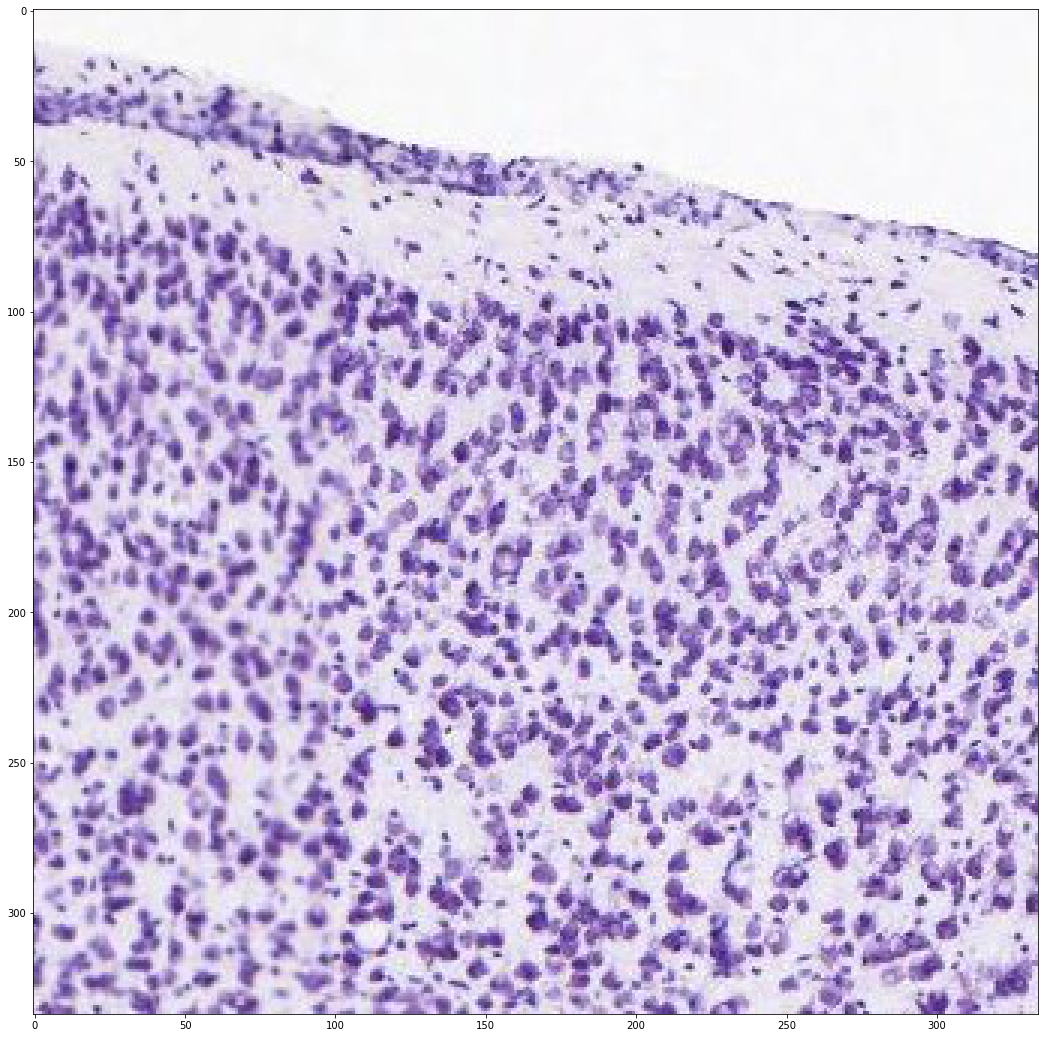

In [112]:
mob_image = df[df['structure_acronym'] == 'VIS']
verify_image(mob_image.iloc[0]["destination"])

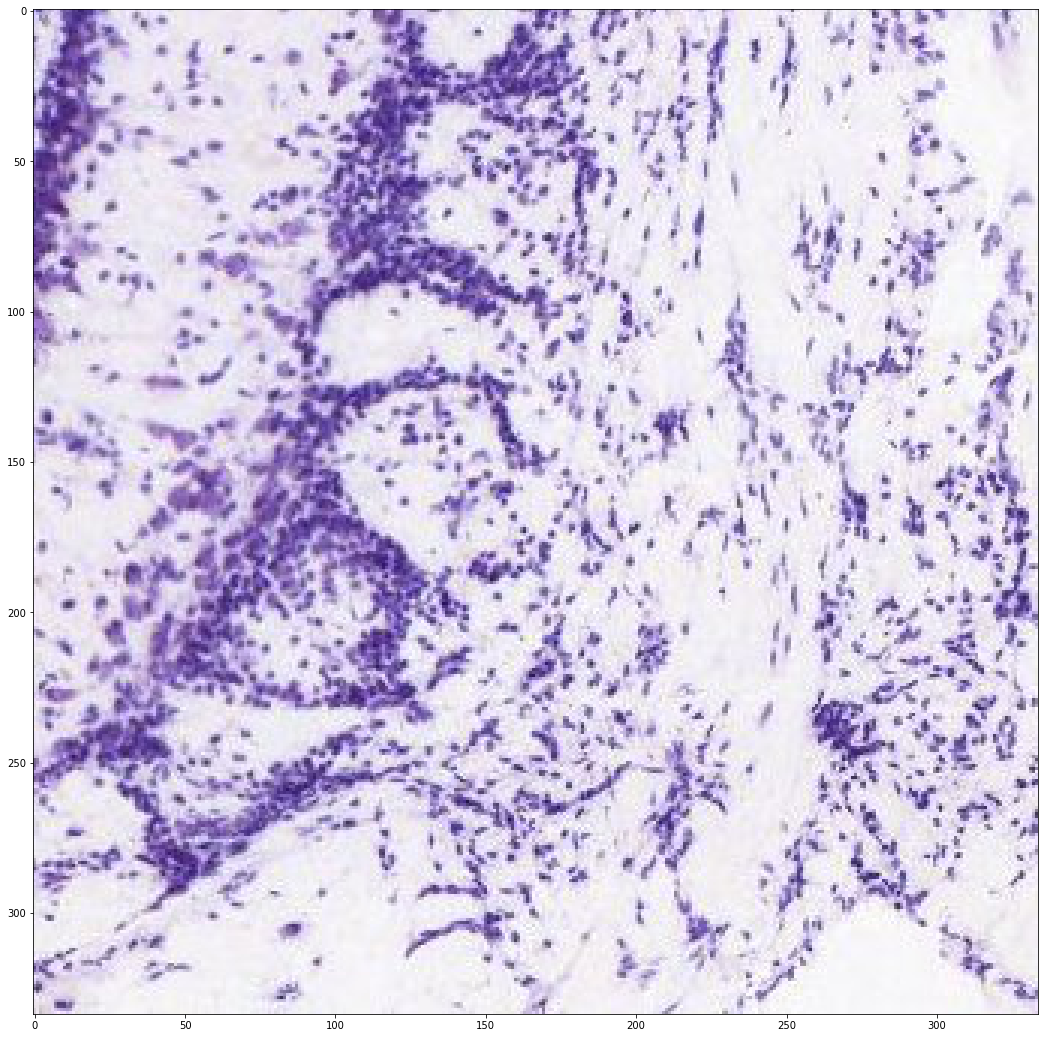

In [103]:
mob_image = df[df['structure_acronym'] == 'MOB']
verify_image(mob_image.iloc[0]["destination"])

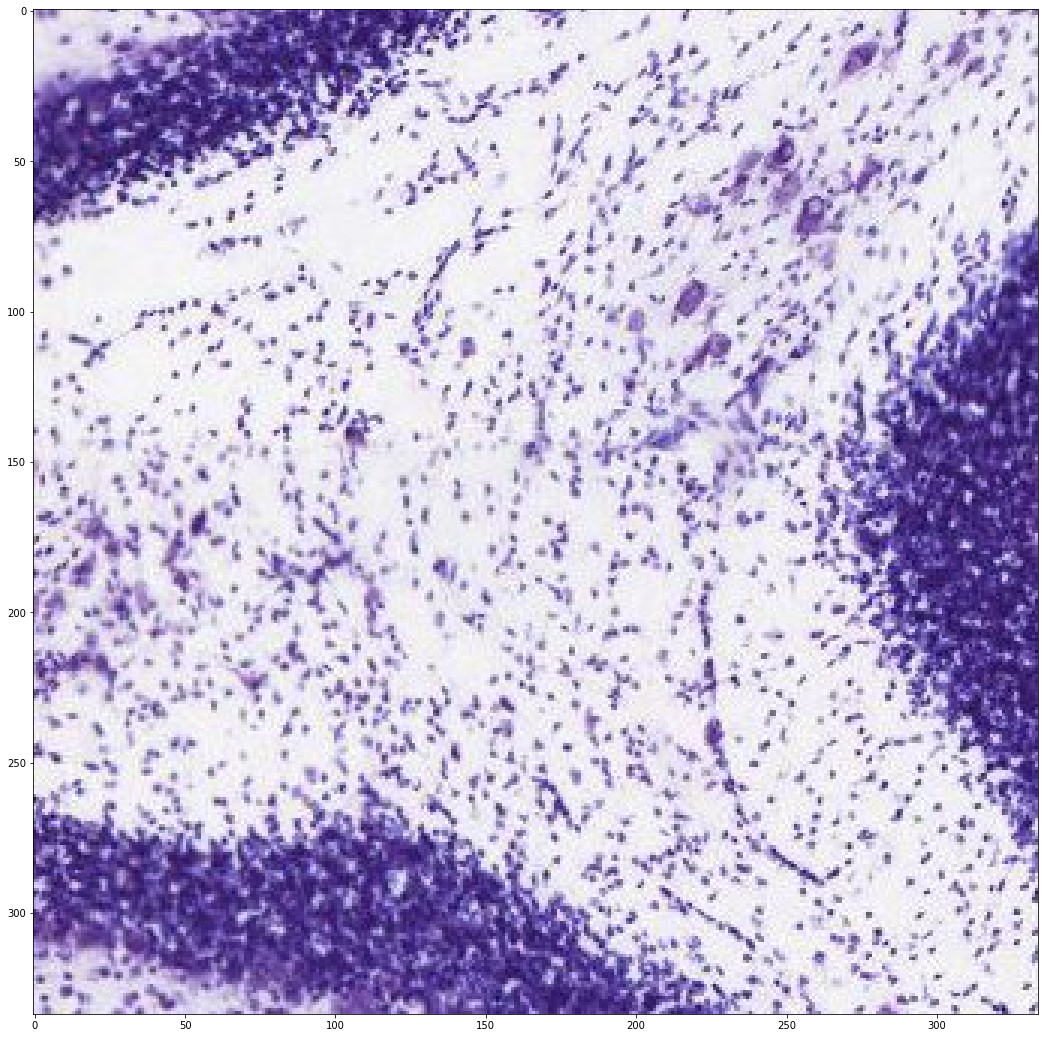

In [104]:
mob_image = df[df['structure_acronym'] == 'PYR']
verify_image(mob_image.iloc[0]["destination"])

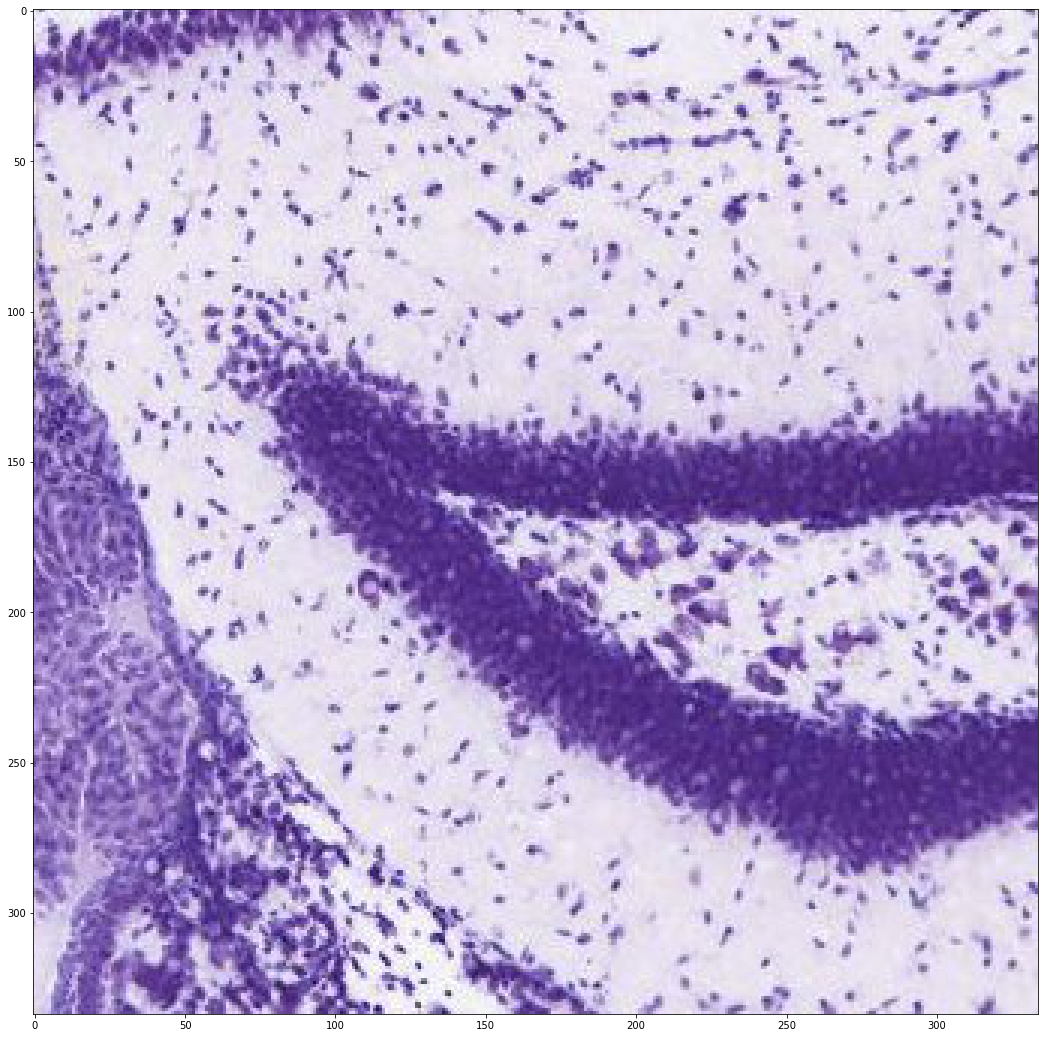

In [105]:
mob_image = df[df['structure_acronym'] == 'DG']
verify_image(mob_image.iloc[0]["destination"])

In [106]:
df.to_csv('ROIs_information.csv', sep='\t', encoding='utf-8')

In [107]:
display(df)

,section_data_set_id,section_image_id,x_sec,y_sec,structure_acronym,structure_id,x_ref,y_ref,z_ref,destination
0,74452077,74405857,8028.651606,2220.822013,DG,726,6200,2433.0,5683.0,DG_726/74405857_8028.6516059194755_2220.822012...
1,74452077,74405855,5251.567808,2613.687511,DG,726,6400,2433.0,5683.0,DG_726/74405855_5251.567807918029_2613.6875114...
2,74452077,74405855,4660.962111,2595.214898,DG,726,6500,2433.0,5033.0,DG_726/74405855_4660.96211055974_2595.21489757...
3,74452077,74405855,5843.477234,2632.210825,DG,726,6600,2433.0,6333.0,DG_726/74405855_5843.477234075324_2632.2108248...
4,74452077,74405853,4636.010872,2308.621522,DG,726,6700,2433.0,5033.0,DG_726/74405853_4636.0108719865575_2308.621522...
...,...,...,...,...,...,...,...,...,...,...
426,74452077,74405813,6124.582558,558.815590,VIS,669,10200,1133.0,7633.0,VIS_669/74405813_6124.582558386709_558.8155900...
427,74452077,74405813,1391.587602,1098.477474,VIS,669,10200,1783.0,2433.0,VIS_669/74405813_1391.5876021685958_1098.47747...
428,74452077,74405813,6713.485914,1125.394035,VIS,669,10200,1783.0,8283.0,VIS_669/74405813_6713.485913739047_1125.394034...
429,74452077,74405813,7304.807948,1128.384764,VIS,669,10200,1783.0,8933.0,VIS_669/74405813_7304.807948357984_1128.384763...


In [130]:
import urllib.request, json 
# http://api.brain-map.org/api/v2/data/query.json?criteria=
# model::SectionDataSet,
# rma::criteria,
# [failed$eqfalse],products[id$eq1],treatments[name$eqNISSL],
# plane_of_section[name$eq%27coronal%27]
# ,rma::options
# [start_row$eq0]
# [num_rows$eq1000]
with urllib.request.urlopen("http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionDataSet,rma::criteria,[failed$eqfalse],products[id$eq1],treatments[name$eqNISSL],plane_of_section[name$eq%27coronal%27],rma::options[start_row$eq0][num_rows$eq1000]") as url:
    data = json.loads(url.read().decode())
    print(len(data['msg']))
msg = data['msg']
Nissl_Dataset_list = []
for i in range(len(msg)):
  Nissl_Dataset_list.append(msg[i]["id"])
print(Nissl_Dataset_list[0:100:1])

1000
[74260967, 74452077, 75206826, 75644396, 70849871, 70621895, 70833229, 71153425, 77863999, 74473019, 72082586, 71799195, 307768024, 74963139, 75277177, 77442425, 72021414, 70636624, 74811440, 74812200, 73987046, 79855521, 74963171, 70807684, 75643569, 75000204, 72556687, 75753614, 70917751, 74812688, 75644332, 72069219, 77358871, 69975801, 74075365, 75754074, 79618904, 73553664, 72135380, 74864566, 79618744, 73910704, 71030587, 72020998, 74472723, 71701648, 74027970, 73544798, 74964123, 72103445, 75093387, 77489802, 70738098, 71700013, 71812746, 74589720, 75994018, 74260903, 71942007, 75994426, 75206949, 71868842, 74913139, 73475521, 72069098, 71772863, 74864058, 71153070, 71946564, 74912819, 71030315, 75000439, 74021265, 74330781, 75000552, 71153144, 71799387, 70832201, 70230058, 72134916, 73544830, 79855553, 74964059, 71050284, 73911128, 74696824, 70638461, 74590928, 73823536, 71708537, 71505058, 74864118, 80377719, 74812072, 71772519, 72109263, 74912491, 71029440, 70638757, 726